<a href="https://colab.research.google.com/github/kjghfnxggdgbvg/kjghfnxggdgbvg/blob/main/multi_linear_regression_assign2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [310]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [311]:
df = pd.read_csv("/content/ToyotaCorolla.csv",index_col = 0,encoding = 'latin=1')

In [312]:
df

,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Id,,,,,,,,,,,,,,,,,,,,,
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,...,1,1,1,0,0,0,1,0,0,0
2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,...,1,0,1,0,0,0,1,0,0,0
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,...,0,0,1,0,0,0,1,0,0,0
4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,...,0,0,1,0,0,0,1,0,0,0
5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,Blue,...,1,1,1,0,1,1,1,0,0,0
1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,Grey,...,0,0,1,0,0,1,1,0,0,0
1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,Blue,...,0,0,1,0,0,0,1,0,0,0


In [313]:
#AS PER MENTIONED IN QUESTION I CONSIDERED ONLY THOSE COLUMNS REST OF ALL ARE DROPED

In [314]:
df.drop(['Mfg_Month','Mfg_Year','Fuel_Type','Met_Color','Color','Central_Lock','Powered_Windows','Power_Steering','Radio','Mistlamps','Sport_Model','Backseat_Divider','Metallic_Rim','Radio_cassette','Tow_Bar','Automatic','Cylinders','Mfr_Guarantee','BOVAG_Guarantee','Guarantee_Period','ABS','Airbag_1','Airbag_2','Airco','Automatic_airco','Boardcomputer','CD_Player'
],axis=1,inplace=True)

In [315]:
df

,Model,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Id,,,,,,,,,,
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,2000,3,5,210,1165
2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,2000,3,5,210,1165
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,2000,3,5,210,1165
4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,2000,3,5,210,1165
5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,1300,3,5,69,1025
1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,1300,3,5,69,1015
1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,1300,3,5,69,1015


In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 1 to 1442
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Model          1436 non-null   object
 1   Price          1436 non-null   int64 
 2   Age_08_04      1436 non-null   int64 
 3   KM             1436 non-null   int64 
 4   HP             1436 non-null   int64 
 5   cc             1436 non-null   int64 
 6   Doors          1436 non-null   int64 
 7   Gears          1436 non-null   int64 
 8   Quarterly_Tax  1436 non-null   int64 
 9   Weight         1436 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 123.4+ KB


In [317]:
df.describe()


,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [318]:
df.head()


,Model,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Id,,,,,,,,,,
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,2000,3,5,210,1165
2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,2000,3,5,210,1165
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,2000,3,5,210,1165
4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,2000,3,5,210,1165
5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,2000,3,5,210,1170


In [319]:
df.tail()

,Model,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Id,,,,,,,,,,
1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,1300,3,5,69,1025
1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,1300,3,5,69,1015
1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,1300,3,5,69,1015
1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,1300,3,5,69,1015
1442,TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors,6950,76,1,110,1600,5,5,19,1114


In [320]:
df['Model'] = pd.to_numeric(df['Model'],errors='coerce')

In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 1 to 1442
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Model          0 non-null      float64
 1   Price          1436 non-null   int64  
 2   Age_08_04      1436 non-null   int64  
 3   KM             1436 non-null   int64  
 4   HP             1436 non-null   int64  
 5   cc             1436 non-null   int64  
 6   Doors          1436 non-null   int64  
 7   Gears          1436 non-null   int64  
 8   Quarterly_Tax  1436 non-null   int64  
 9   Weight         1436 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 123.4 KB


In [322]:
# rename columns

In [323]:
df1 = df.rename({'Age_08_04':'Age'},axis=1)

In [324]:
df1

,Model,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Id,,,,,,,,,,
1,NaN,13500,23,46986,90,2000,3,5,210,1165
2,NaN,13750,23,72937,90,2000,3,5,210,1165
3,NaN,13950,24,41711,90,2000,3,5,210,1165
4,NaN,14950,26,48000,90,2000,3,5,210,1165
5,NaN,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1438,NaN,7500,69,20544,86,1300,3,5,69,1025
1439,NaN,10845,72,19000,86,1300,3,5,69,1015
1440,NaN,8500,71,17016,86,1300,3,5,69,1015


In [325]:
# no missing value , no unique values

In [326]:
df1.duplicated()

Id
1       False
2       False
3       False
4       False
5       False
        ...  
1438    False
1439    False
1440    False
1441    False
1442    False
Length: 1436, dtype: bool

In [327]:
# no duplicates

{'whiskers': [<matplotlib.lines.Line2D at 0x7b806b742050>,
 'caps': [<matplotlib.lines.Line2D at 0x7b806b740ac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b806b741db0>],
 'medians': [<matplotlib.lines.Line2D at 0x7b806b7429b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b806b742c50>],
 'means': []}

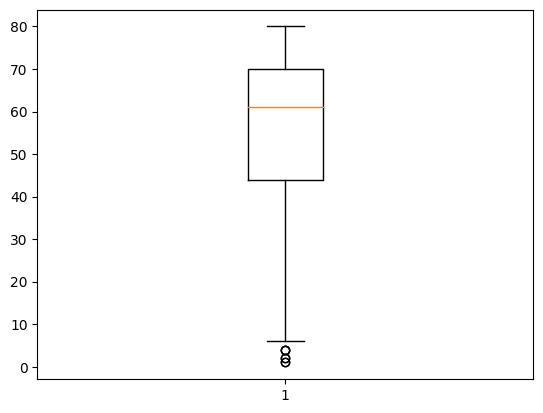

In [328]:
plt.boxplot(df1.Age)

{'whiskers': [<matplotlib.lines.Line2D at 0x7b806b7ae710>,
 'caps': [<matplotlib.lines.Line2D at 0x7b806b7aec50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b806b7ae470>],
 'medians': [<matplotlib.lines.Line2D at 0x7b806b7af190>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b806b7af430>],
 'means': []}

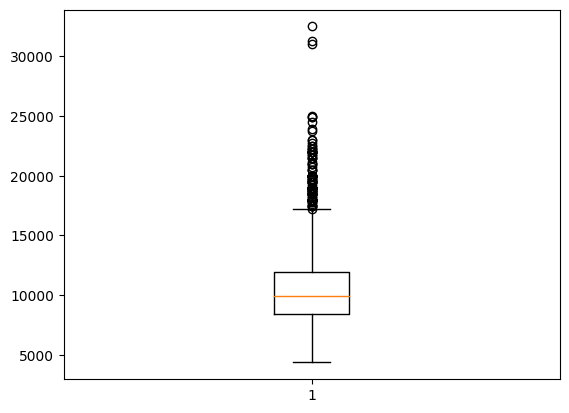

In [329]:
plt.boxplot(df1.Price)

{'whiskers': [<matplotlib.lines.Line2D at 0x7b806b81ce80>,
 'caps': [<matplotlib.lines.Line2D at 0x7b806b81d3c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b806b81cbe0>],
 'medians': [<matplotlib.lines.Line2D at 0x7b806b81d900>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b806b81dba0>],
 'means': []}

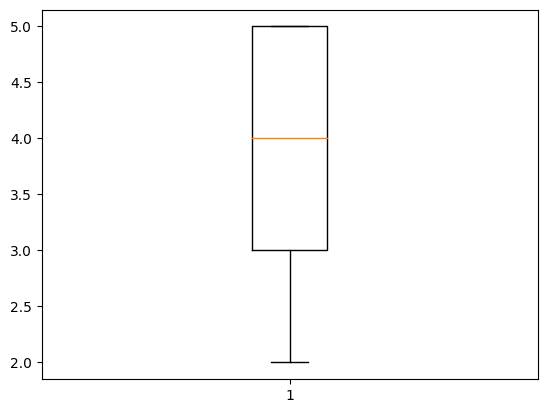

In [330]:
plt.boxplot(df1.Doors)

{'whiskers': [<matplotlib.lines.Line2D at 0x7b806b694040>,
 'caps': [<matplotlib.lines.Line2D at 0x7b806b694580>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b806b667d60>],
 'medians': [<matplotlib.lines.Line2D at 0x7b806b694ac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b806b694d60>],
 'means': []}

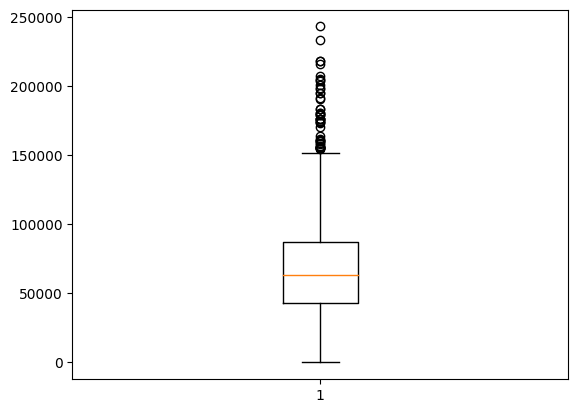

In [331]:
plt.boxplot(df1.KM)

{'whiskers': [<matplotlib.lines.Line2D at 0x7b806b6da980>,
 'caps': [<matplotlib.lines.Line2D at 0x7b806b6daec0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b806b6da6e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7b806b6db2b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b806b6db580>],
 'means': []}

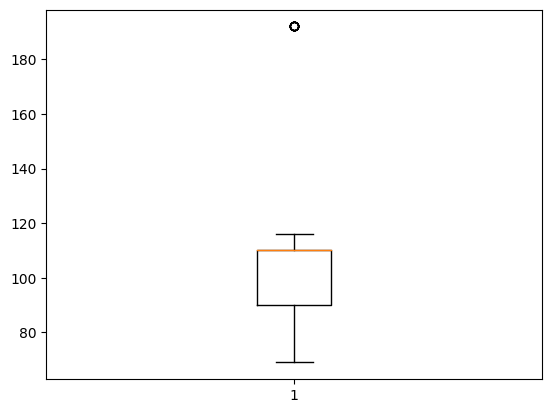

In [332]:
plt.boxplot(df1.HP)

{'whiskers': [<matplotlib.lines.Line2D at 0x7b806b54d390>,
 'caps': [<matplotlib.lines.Line2D at 0x7b806b54d7b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b806b54d0f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7b806b54dcf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b806b54df90>],
 'means': []}

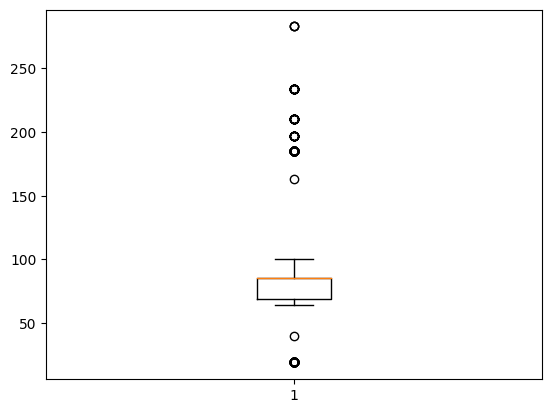

In [333]:
plt.boxplot(df1.Quarterly_Tax)

{'whiskers': [<matplotlib.lines.Line2D at 0x7b806b59b370>,
 'caps': [<matplotlib.lines.Line2D at 0x7b806b59b8b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b806b59b0d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7b806b59bdf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b806b5c80d0>],
 'means': []}

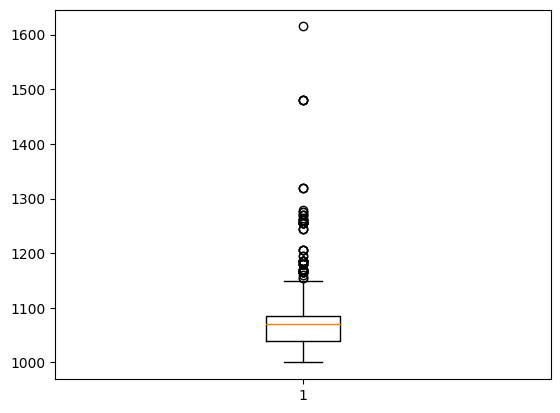

In [334]:
plt.boxplot(df1.Weight)

{'whiskers': [<matplotlib.lines.Line2D at 0x7b806b60a650>,
 'caps': [<matplotlib.lines.Line2D at 0x7b806b60ab90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b806b60a3b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7b806b60b040>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b806b60b2e0>],
 'means': []}

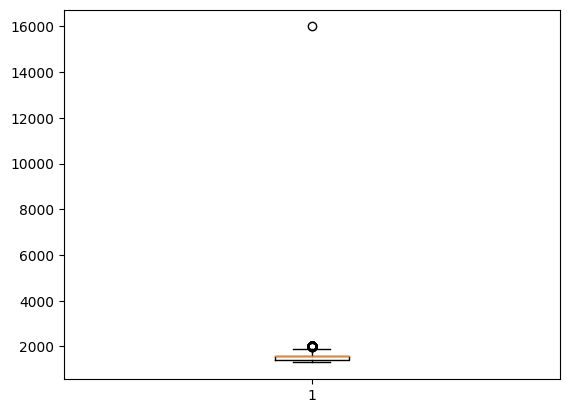

In [335]:
plt.boxplot(df1.cc)

{'whiskers': [<matplotlib.lines.Line2D at 0x7b806b47a440>,
 'caps': [<matplotlib.lines.Line2D at 0x7b806b47a980>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b806b47a1a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7b806b47aec0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b806b47b160>],
 'means': []}

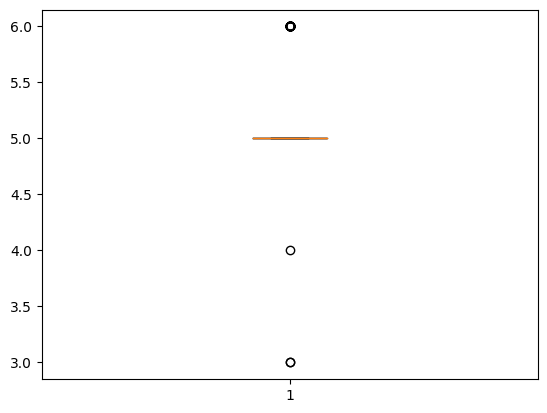

In [336]:
plt.boxplot(df1.Gears)

In [337]:
# outliers are found we can remove use cooks distance

<ipython-input-338-29dcdd096848>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Age'])


<Axes: xlabel='Age', ylabel='Density'>

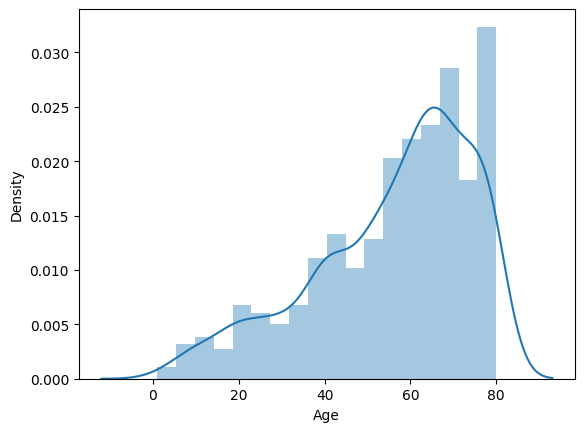

In [338]:
sns.distplot(df1['Age'])

<ipython-input-339-168a7d7cb3f0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Price'])


<Axes: xlabel='Price', ylabel='Density'>

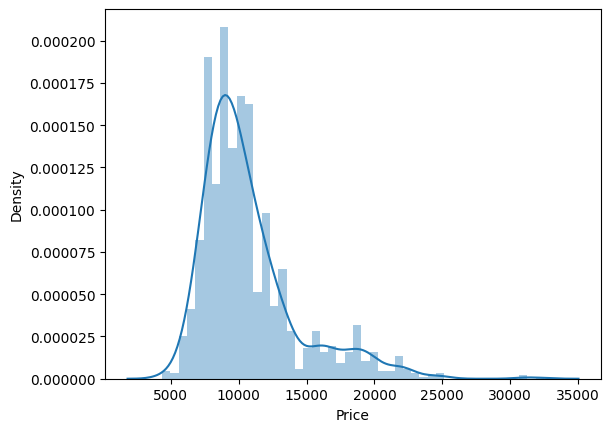

In [339]:
sns.distplot(df1['Price'])

<ipython-input-340-632985cb963f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['KM'])


<Axes: xlabel='KM', ylabel='Density'>

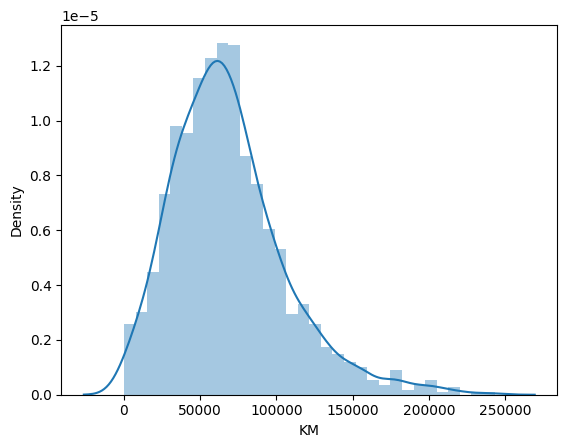

In [340]:
sns.distplot(df1['KM'])

<ipython-input-341-f48caadd5da2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['HP'])


<Axes: xlabel='HP', ylabel='Density'>

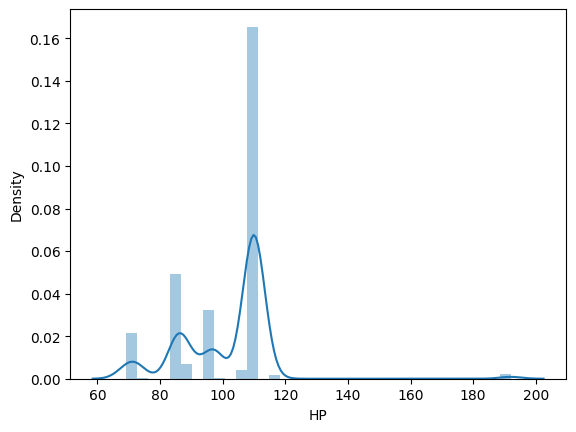

In [341]:
sns.distplot(df1['HP'])

<ipython-input-342-bd9caacb2344>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['cc'])


<Axes: xlabel='cc', ylabel='Density'>

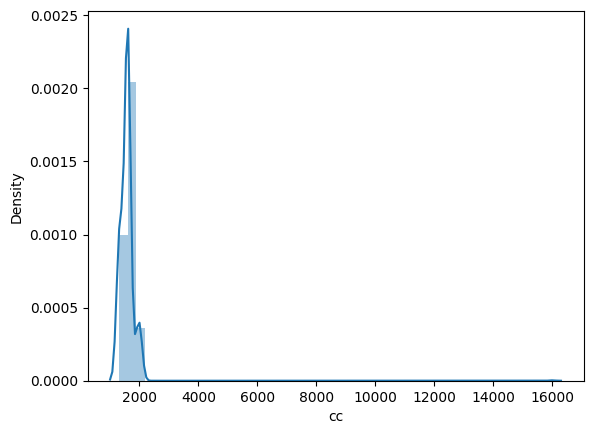

In [342]:
sns.distplot(df1['cc'])

<ipython-input-343-3c29bac042d2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Doors'])


<Axes: xlabel='Doors', ylabel='Density'>

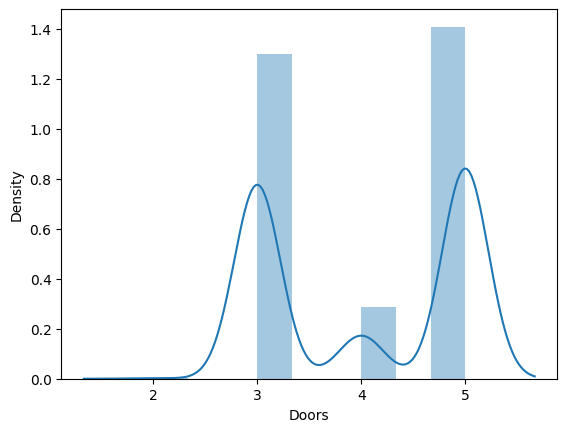

In [343]:
sns.distplot(df1['Doors'])

<ipython-input-344-70a3c4d3611a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Gears'])


<Axes: xlabel='Gears', ylabel='Density'>

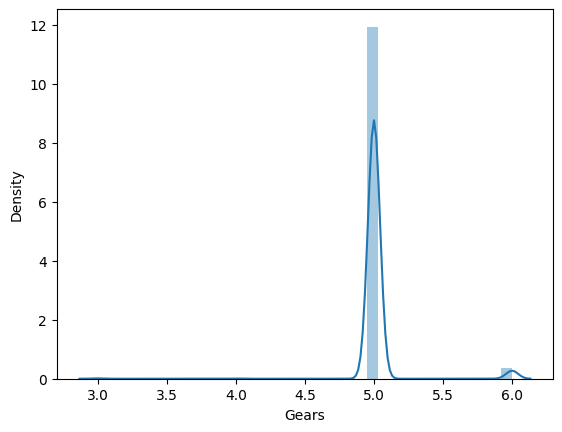

In [344]:
sns.distplot(df1['Gears'])

<ipython-input-345-f4a1e2664f1b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Quarterly_Tax'])


<Axes: xlabel='Quarterly_Tax', ylabel='Density'>

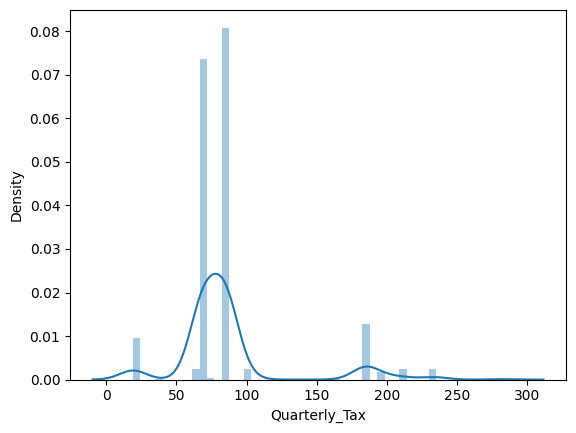

In [345]:
sns.distplot(df1['Quarterly_Tax'])

<ipython-input-346-0e275ea948cb>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

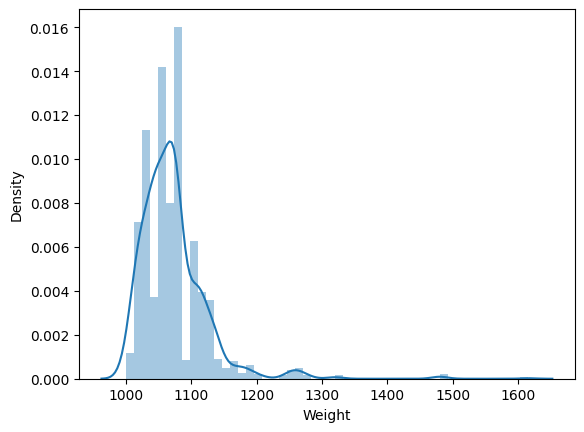

In [346]:
sns.distplot(df1['Weight'])

In [347]:
# scatterplot plot and correlation analysis

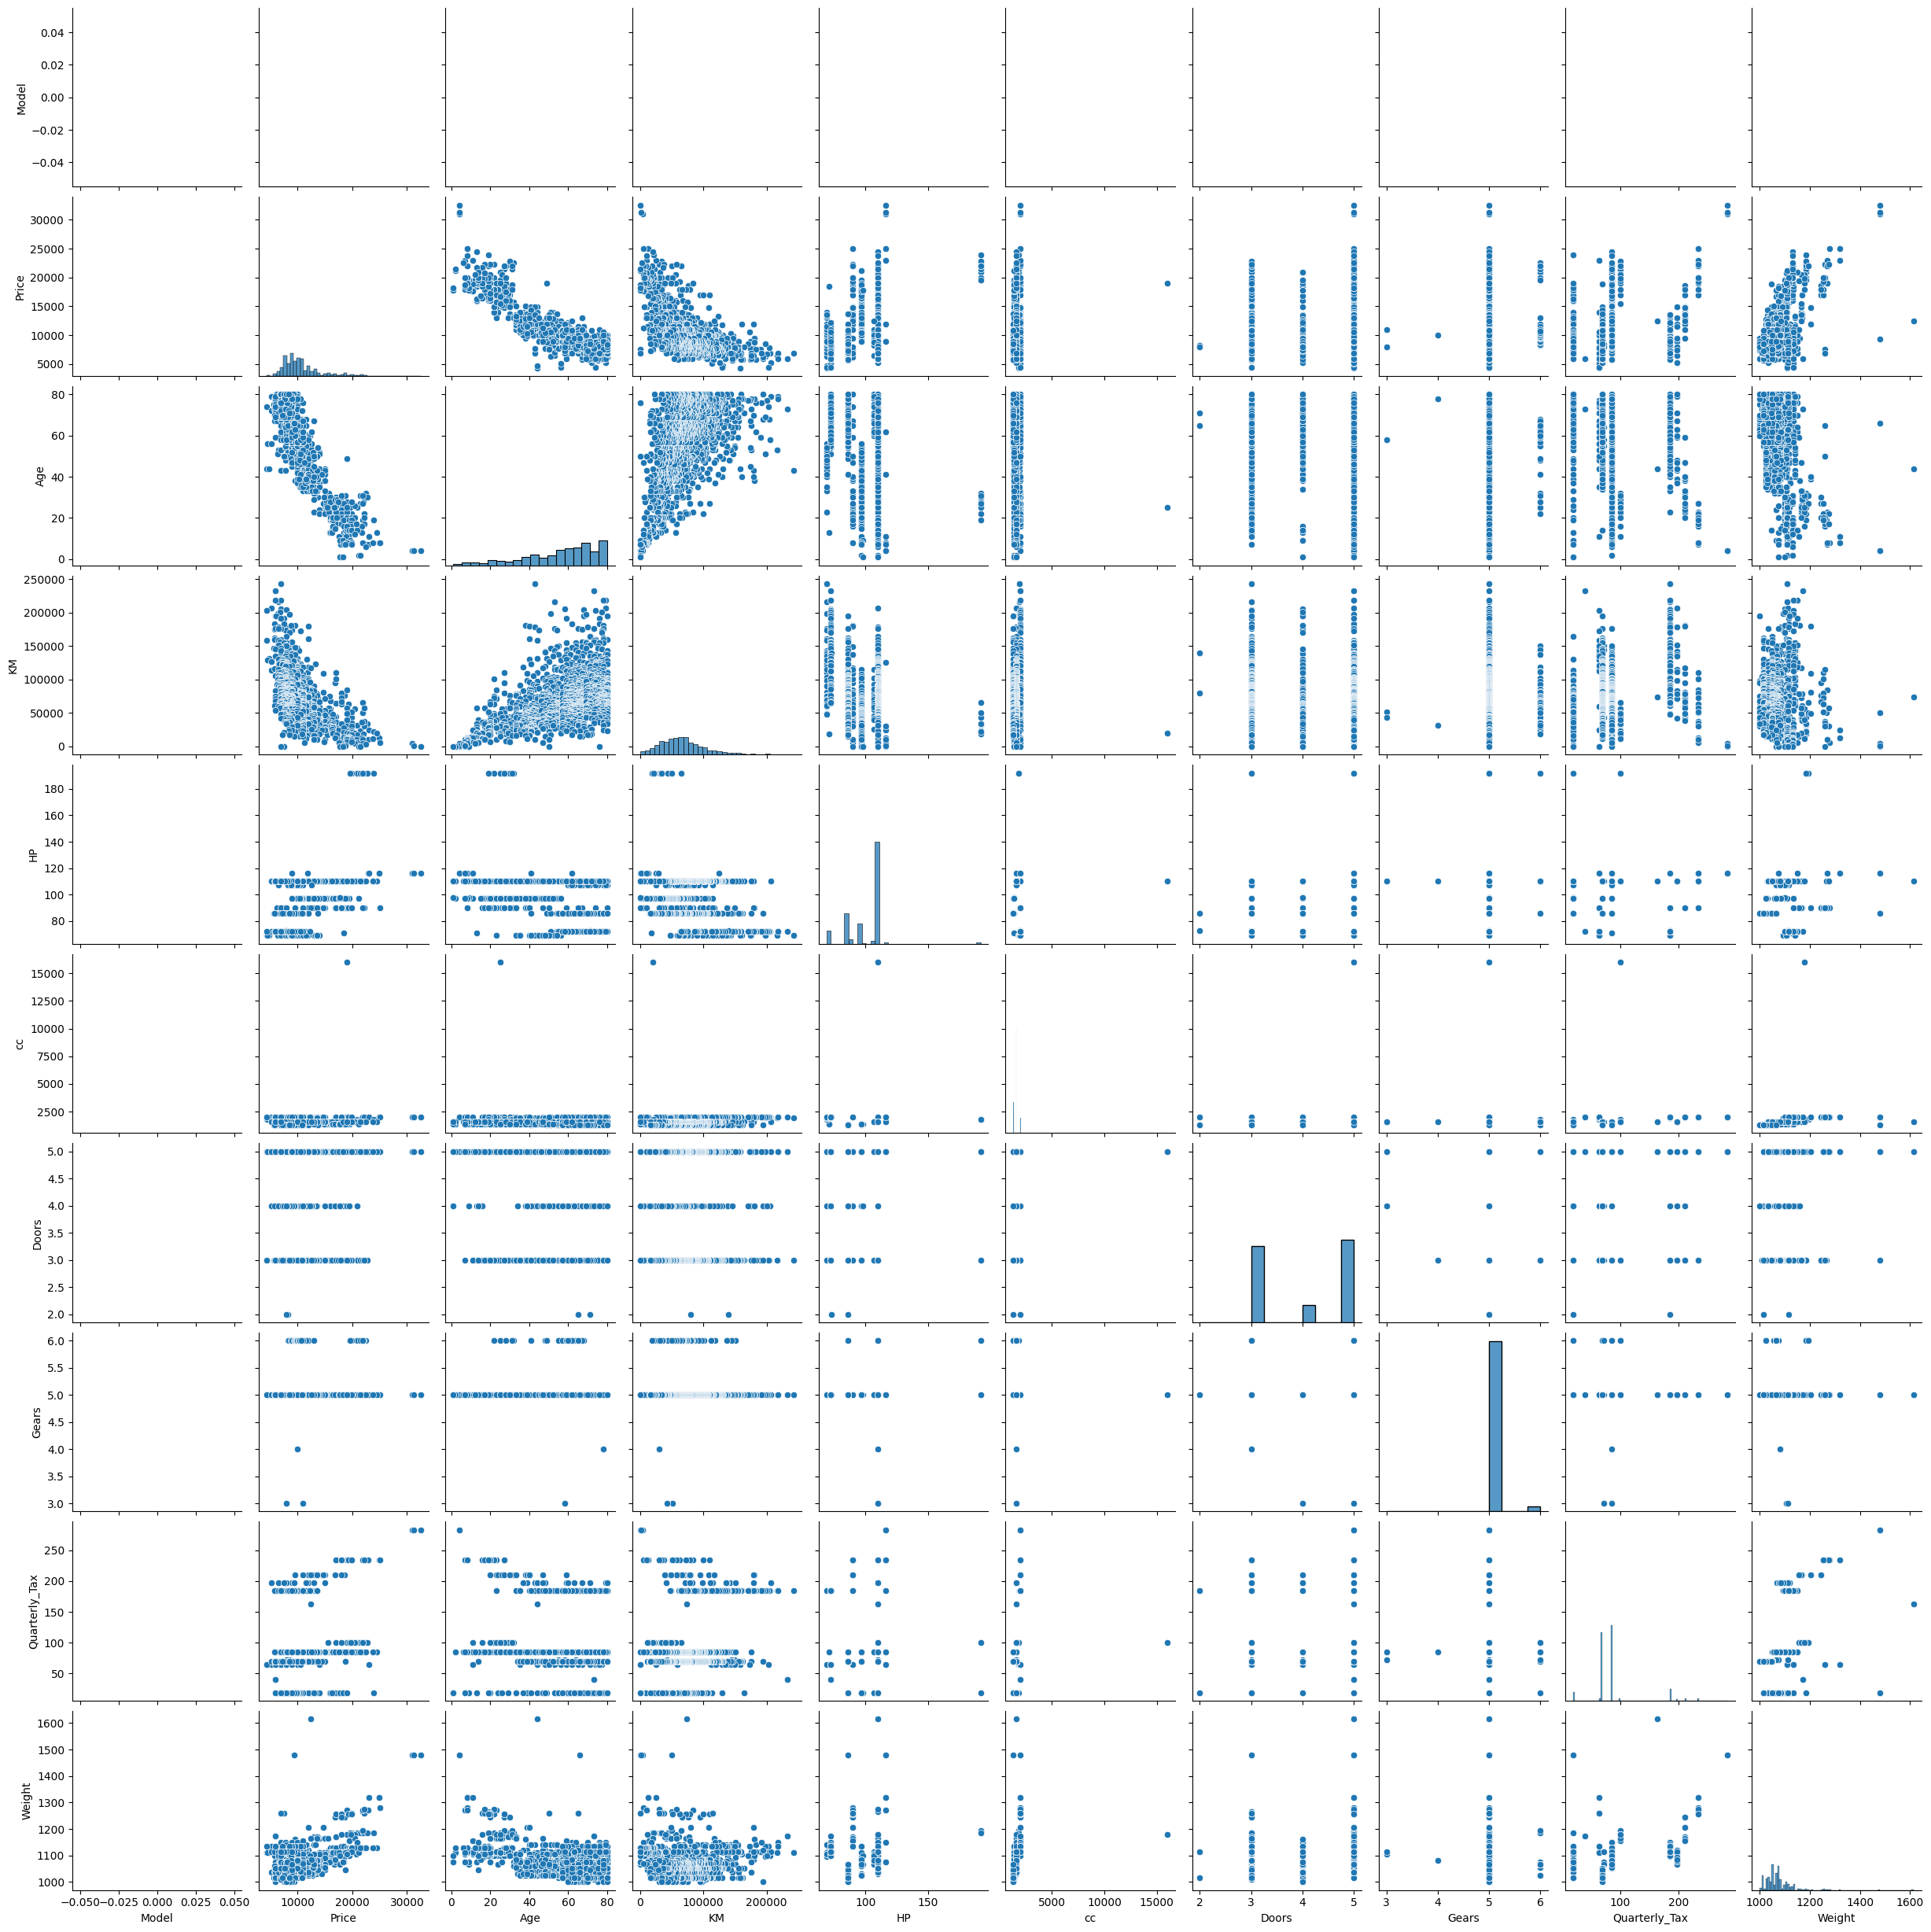

In [264]:
import seaborn as sns
sns.pairplot(df1)

In [348]:
df1.corr()

,Model,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Model,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,NaN,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age,NaN,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,NaN,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,NaN,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,NaN,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,NaN,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,NaN,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,NaN,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,NaN,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


,Model,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Model,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,NaN,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age,NaN,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,NaN,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,NaN,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,NaN,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,NaN,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,NaN,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,NaN,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,NaN,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [349]:
# there is slight relation between quarterly_tax,Weight and KM,age

In [350]:
import statsmodels.formula.api as smf
model = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df1).fit()

In [351]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Tue, 12 Sep 2023   Prob (F-statistic):               0.00
Time:                        12:31:44   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age            -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Tue, 12 Sep 2023   Prob (F-statistic):               0.00
Time:                        12:32:03   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age            -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [352]:
model.params

Intercept       -5573.106358
Age              -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

Intercept       -5573.106358
Age              -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [353]:
(model.rsquared,model.rsquared_adj)

(0.8637627463428191, 0.8629989775766962)

(0.8637627463428191, 0.8629989775766962)

In [354]:
import statsmodels.formula.api as smf
model1 = smf.ols('Price~Age',data=df1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     4758.
Date:                Tue, 12 Sep 2023   Prob (F-statistic):               0.00
Time:                        12:31:45   Log-Likelihood:                -12756.
No. Observations:                1436   AIC:                         2.552e+04
Df Residuals:                    1434   BIC:                         2.553e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.029e+04    146.097    138.908      0.000       2e+04    2.06e+04
Age         -170.9336      2.478    -68.978      0.000    -175.795    -166.073
==============================================================================
Omnibus:                      359.275   Durbin-Watson:                   1.214
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2774.226
Skew:                           0.946   Prob(JB):                         0.00
Kurtosis:                       9.541   Cond. No.                         187.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     4758.
Date:                Tue, 12 Sep 2023   Prob (F-statistic):               0.00
Time:                        12:32:04   Log-Likelihood:                -12756.
No. Observations:                1436   AIC:                         2.552e+04
Df Residuals:                    1434   BIC:                         2.553e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.029e+04    146.097    138.908      0.000       2e+04    2.06e+04
Age         -170.9336      2.478    -68.978      0.000    -175.795    -166.073
==============================================================================
Omnibus:                      359.275   Durbin-Watson:                   1.214
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2774.226
Skew:                           0.946   Prob(JB):                         0.00
Kurtosis:                       9.541   Cond. No.                         187.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [355]:
model1.params

Intercept    20294.058649
Age           -170.933585
dtype: float64

Intercept    20294.058649
Age           -170.933585
dtype: float64

In [356]:
(model1.rsquared,model1.rsquared_adj)

(0.7684108996825327, 0.7682494010072765)

(0.7684108996825327, 0.7682494010072765)

In [357]:
import statsmodels.formula.api as smf
model2 = smf.ols('Price~KM',data=df1).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     690.0
Date:                Tue, 12 Sep 2023   Prob (F-statistic):          1.76e-124
Time:                        12:31:45   Log-Likelihood:                -13525.
No. Observations:                1436   AIC:                         2.705e+04
Df Residuals:                    1434   BIC:                         2.706e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.451e+04    163.915     88.510      0.000    1.42e+04    1.48e+04
KM            -0.0551      0.002    -26.268      0.000      -0.059      -0.051
==============================================================================
Omnibus:                      390.716   Durbin-Watson:                   0.386
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1115.783
Skew:                           1.388   Prob(JB):                    5.14e-243
Kurtosis:                       6.308   Cond. No.                     1.63e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     690.0
Date:                Tue, 12 Sep 2023   Prob (F-statistic):          1.76e-124
Time:                        12:32:04   Log-Likelihood:                -13525.
No. Observations:                1436   AIC:                         2.705e+04
Df Residuals:                    1434   BIC:                         2.706e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.451e+04    163.915     88.510      0.000    1.42e+04    1.48e+04
KM            -0.0551      0.002    -26.268      0.000      -0.059      -0.051
==============================================================================
Omnibus:                      390.716   Durbin-Watson:                   0.386
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1115.783
Skew:                           1.388   Prob(JB):                    5.14e-243
Kurtosis:                       6.308   Cond. No.                     1.63e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [358]:
model2.params

Intercept    14508.140011
KM              -0.055117
dtype: float64

Intercept    14508.140011
KM              -0.055117
dtype: float64

In [359]:
(model2.rsquared,model2.rsquared_adj)

(0.3248545891553042, 0.3243837764559704)

(0.3248545891553042, 0.3243837764559704)

In [360]:
import statsmodels.formula.api as smf
model3 = smf.ols('Price~HP',data=df1).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     158.0
Date:                Tue, 12 Sep 2023   Prob (F-statistic):           1.93e-34
Time:                        12:31:45   Log-Likelihood:                -13732.
No. Observations:                1436   AIC:                         2.747e+04
Df Residuals:                    1434   BIC:                         2.748e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2990.2764    622.568      4.803      0.000    1769.035    4211.518
HP            76.2600      6.068     12.568      0.000      64.357      88.163
==============================================================================
Omnibus:                      448.876   Durbin-Watson:                   0.338
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1327.172
Skew:                           1.591   Prob(JB):                    6.43e-289
Kurtosis:                       6.472   Cond. No.                         703.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     158.0
Date:                Tue, 12 Sep 2023   Prob (F-statistic):           1.93e-34
Time:                        12:32:04   Log-Likelihood:                -13732.
No. Observations:                1436   AIC:                         2.747e+04
Df Residuals:                    1434   BIC:                         2.748e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2990.2764    622.568      4.803      0.000    1769.035    4211.518
HP            76.2600      6.068     12.568      0.000      64.357      88.163
==============================================================================
Omnibus:                      448.876   Durbin-Watson:                   0.338
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1327.172
Skew:                           1.591   Prob(JB):                    6.43e-289
Kurtosis:                       6.472   Cond. No.                         703.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [361]:
import statsmodels.formula.api as smf
model4 = smf.ols('Price~cc',data=df1).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     23.28
Date:                Tue, 12 Sep 2023   Prob (F-statistic):           1.55e-06
Time:                        12:31:45   Log-Likelihood:                -13795.
No. Observations:                1436   AIC:                         2.759e+04
Df Residuals:                    1434   BIC:                         2.760e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9027.5548    365.576     24.694      0.000    8310.435    9744.675
cc             1.0802      0.224      4.825      0.000       0.641       1.519
==============================================================================
Omnibus:                      465.181   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1390.401
Skew:                           1.649   Prob(JB):                    1.20e-302
Kurtosis:                       6.516   Cond. No.                     6.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     23.28
Date:                Tue, 12 Sep 2023   Prob (F-statistic):           1.55e-06
Time:                        12:32:04   Log-Likelihood:                -13795.
No. Observations:                1436   AIC:                         2.759e+04
Df Residuals:                    1434   BIC:                         2.760e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9027.5548    365.576     24.694      0.000    8310.435    9744.675
cc             1.0802      0.224      4.825      0.000       0.641       1.519
==============================================================================
Omnibus:                      465.181   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1390.401
Skew:                           1.649   Prob(JB):                    1.20e-302
Kurtosis:                       6.516   Cond. No.                     6.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [362]:
import statsmodels.formula.api as smf
model5 = smf.ols('Price~Doors',data=df1).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     51.00
Date:                Tue, 12 Sep 2023   Prob (F-statistic):           1.46e-12
Time:                        12:31:45   Log-Likelihood:                -13782.
No. Observations:                1436   AIC:                         2.757e+04
Df Residuals:                    1434   BIC:                         2.758e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7885.0058    409.438     19.258      0.000    7081.843    8688.168
Doors        705.5586     98.795      7.142      0.000     511.761     899.356
==============================================================================
Omnibus:                      466.779   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1406.209
Skew:                           1.651   Prob(JB):                    4.42e-306
Kurtosis:                       6.549   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     51.00
Date:                Tue, 12 Sep 2023   Prob (F-statistic):           1.46e-12
Time:                        12:32:04   Log-Likelihood:                -13782.
No. Observations:                1436   AIC:                         2.757e+04
Df Residuals:                    1434   BIC:                         2.758e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7885.0058    409.438     19.258      0.000    7081.843    8688.168
Doors        705.5586     98.795      7.142      0.000     511.761     899.356
==============================================================================
Omnibus:                      466.779   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1406.209
Skew:                           1.651   Prob(JB):                    4.42e-306
Kurtosis:                       6.549   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [363]:
import statsmodels.formula.api as smf
model6 = smf.ols('Price~Gears',data=df1).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     5.733
Date:                Tue, 12 Sep 2023   Prob (F-statistic):             0.0168
Time:                        12:31:45   Log-Likelihood:                -13804.
No. Observations:                1436   AIC:                         2.761e+04
Df Residuals:                    1434   BIC:                         2.762e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4628.0652   2550.553      1.815      0.070    -375.149    9631.280
Gears       1214.1261    507.069      2.394      0.017     219.450    2208.802
==============================================================================
Omnibus:                      483.564   Durbin-Watson:                   0.260
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1509.458
Skew:                           1.698   Prob(JB):                         0.00
Kurtosis:                       6.700   Cond. No.                         140.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     5.733
Date:                Tue, 12 Sep 2023   Prob (F-statistic):             0.0168
Time:                        12:32:04   Log-Likelihood:                -13804.
No. Observations:                1436   AIC:                         2.761e+04
Df Residuals:                    1434   BIC:                         2.762e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4628.0652   2550.553      1.815      0.070    -375.149    9631.280
Gears       1214.1261    507.069      2.394      0.017     219.450    2208.802
==============================================================================
Omnibus:                      483.564   Durbin-Watson:                   0.260
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1509.458
Skew:                           1.698   Prob(JB):                         0.00
Kurtosis:                       6.700   Cond. No.                         140.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [364]:
import statsmodels.formula.api as smf
model7 = smf.ols('Price~Quarterly_Tax',data=df1).fit()
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     72.38
Date:                Tue, 12 Sep 2023   Prob (F-statistic):           4.41e-17
Time:                        12:31:45   Log-Likelihood:                -13771.
No. Observations:                1436   AIC:                         2.755e+04
Df Residuals:                    1434   BIC:                         2.756e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      9046.7382    218.889     41.330      0.000    8617.362    9476.115
Quarterly_Tax    19.3301      2.272      8.507      0.000      14.873      23.787
==============================================================================
Omnibus:                      369.212   Durbin-Watson:                   0.276
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              843.513
Skew:                           1.417   Prob(JB):                    6.82e-184
Kurtosis:                       5.462   Cond. No.                         226.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     72.38
Date:                Tue, 12 Sep 2023   Prob (F-statistic):           4.41e-17
Time:                        12:32:04   Log-Likelihood:                -13771.
No. Observations:                1436   AIC:                         2.755e+04
Df Residuals:                    1434   BIC:                         2.756e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      9046.7382    218.889     41.330      0.000    8617.362    9476.115
Quarterly_Tax    19.3301      2.272      8.507      0.000      14.873      23.787
==============================================================================
Omnibus:                      369.212   Durbin-Watson:                   0.276
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              843.513
Skew:                           1.417   Prob(JB):                    6.82e-184
Kurtosis:                       5.462   Cond. No.                         226.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [365]:
import statsmodels.formula.api as smf
model8 = smf.ols('Price~Weight',data=df1).fit()
model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     731.5
Date:                Tue, 12 Sep 2023   Prob (F-statistic):          1.63e-130
Time:                        12:31:45   Log-Likelihood:                -13511.
No. Observations:                1436   AIC:                         2.703e+04
Df Residuals:                    1434   BIC:                         2.704e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.222e+04   1589.807    -20.264      0.000   -3.53e+04   -2.91e+04
Weight        40.0444      1.481     27.046      0.000      37.140      42.949
==============================================================================
Omnibus:                      105.784   Durbin-Watson:                   0.562
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              531.408
Skew:                           0.028   Prob(JB):                    4.04e-116
Kurtosis:                       5.980   Cond. No.                     2.19e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     731.5
Date:                Tue, 12 Sep 2023   Prob (F-statistic):          1.63e-130
Time:                        12:32:04   Log-Likelihood:                -13511.
No. Observations:                1436   AIC:                         2.703e+04
Df Residuals:                    1434   BIC:                         2.704e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.222e+04   1589.807    -20.264      0.000   -3.53e+04   -2.91e+04
Weight        40.0444      1.481     27.046      0.000      37.140      42.949
==============================================================================
Omnibus:                      105.784   Durbin-Watson:                   0.562
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              531.408
Skew:                           0.028   Prob(JB):                    4.04e-116
Kurtosis:                       5.980   Cond. No.                     2.19e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [366]:
import statsmodels.formula.api as smf
model9 = smf.ols('Price~Quarterly_Tax+Weight',data=df1).fit()
model9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     424.9
Date:                Tue, 12 Sep 2023   Prob (F-statistic):          1.32e-145
Time:                        12:31:45   Log-Likelihood:                -13472.
No. Observations:                1436   AIC:                         2.695e+04
Df Residuals:                    1433   BIC:                         2.697e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -4.14e+04   1862.900    -22.223      0.000   -4.51e+04   -3.77e+04
Quarterly_Tax   -20.9907      2.367     -8.867      0.000     -25.634     -16.347
Weight           50.3131      1.850     27.203      0.000      46.685      53.941
==============================================================================
Omnibus:                      288.653   Durbin-Watson:                   0.703
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3126.381
Skew:                          -0.604   Prob(JB):                         0.00
Kurtosis:                      10.127   Cond. No.                     2.64e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     424.9
Date:                Tue, 12 Sep 2023   Prob (F-statistic):          1.32e-145
Time:                        12:32:04   Log-Likelihood:                -13472.
No. Observations:                1436   AIC:                         2.695e+04
Df Residuals:                    1433   BIC:                         2.697e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -4.14e+04   1862.900    -22.223      0.000   -4.51e+04   -3.77e+04
Quarterly_Tax   -20.9907      2.367     -8.867      0.000     -25.634     -16.347
Weight           50.3131      1.850     27.203      0.000      46.685      53.941
==============================================================================
Omnibus:                      288.653   Durbin-Watson:                   0.703
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3126.381
Skew:                          -0.604   Prob(JB):                         0.00
Kurtosis:                      10.127   Cond. No.                     2.64e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [367]:
import statsmodels.formula.api as smf
model10 = smf.ols('Price~KM+Age',data=df1).fit()
model10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     2695.
Date:                Tue, 12 Sep 2023   Prob (F-statistic):               0.00
Time:                        12:31:45   Log-Likelihood:                -12686.
No. Observations:                1436   AIC:                         2.538e+04
Df Residuals:                    1433   BIC:                         2.539e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.048e+04    140.047    146.259      0.000    2.02e+04    2.08e+04
KM            -0.0165      0.001    -12.130      0.000      -0.019      -0.014
Age         -154.1492      2.736    -56.334      0.000    -159.517    -148.782
==============================================================================
Omnibus:                      448.686   Durbin-Watson:                   1.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3322.042
Skew:                           1.250   Prob(JB):                         0.00
Kurtosis:                      10.019   Cond. No.                     2.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     2695.
Date:                Tue, 12 Sep 2023   Prob (F-statistic):               0.00
Time:                        12:32:04   Log-Likelihood:                -12686.
No. Observations:                1436   AIC:                         2.538e+04
Df Residuals:                    1433   BIC:                         2.539e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.048e+04    140.047    146.259      0.000    2.02e+04    2.08e+04
KM            -0.0165      0.001    -12.130      0.000      -0.019      -0.014
Age         -154.1492      2.736    -56.334      0.000    -159.517    -148.782
==============================================================================
Omnibus:                      448.686   Durbin-Watson:                   1.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3322.042
Skew:                           1.250   Prob(JB):                         0.00
Kurtosis:                      10.019   Cond. No.                     2.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [368]:
import statsmodels.formula.api as smf
model11 = smf.ols('Price~KM+Age+Weight+HP',data=df1).fit()
model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     2230.
Date:                Tue, 12 Sep 2023   Prob (F-statistic):               0.00
Time:                        12:31:45   Log-Likelihood:                -12386.
No. Observations:                1436   AIC:                         2.478e+04
Df Residuals:                    1431   BIC:                         2.481e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4014.6418    936.044     -4.289      0.000   -5850.808   -2178.476
KM            -0.0196      0.001    -16.271      0.000      -0.022      -0.017
Age         -122.4245      2.623    -46.668      0.000    -127.570    -117.278
Weight        18.5319      0.803     23.084      0.000      16.957      20.107
HP            30.2119      2.539     11.897      0.000      25.230      35.193
==============================================================================
Omnibus:                      197.115   Durbin-Watson:                   1.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1498.712
Skew:                          -0.384   Prob(JB):                         0.00
Kurtosis:                       7.946   Cond. No.                     2.05e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.05e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     2230.
Date:                Tue, 12 Sep 2023   Prob (F-statistic):               0.00
Time:                        12:32:04   Log-Likelihood:                -12386.
No. Observations:                1436   AIC:                         2.478e+04
Df Residuals:                    1431   BIC:                         2.481e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4014.6418    936.044     -4.289      0.000   -5850.808   -2178.476
KM            -0.0196      0.001    -16.271      0.000      -0.022      -0.017
Age         -122.4245      2.623    -46.668      0.000    -127.570    -117.278
Weight        18.5319      0.803     23.084      0.000      16.957      20.107
HP            30.2119      2.539     11.897      0.000      25.230      35.193
==============================================================================
Omnibus:                      197.115   Durbin-Watson:                   1.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1498.712
Skew:                          -0.384   Prob(JB):                         0.00
Kurtosis:                       7.946   Cond. No.                     2.05e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.05e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [369]:
# variation inflation factor i.e,vif
rsq_Age = smf.ols('Age~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df1).fit().rsquared
vif_Age = 1/(1-rsq_Age)

rsq_KM = smf.ols('KM~Age+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df1).fit().rsquared
vif_KM = 1/(1-rsq_KM)

rsq_HP = smf.ols('HP~Age+KM+cc+Doors+Gears+Quarterly_Tax+Weight',data=df1).fit().rsquared
vif_HP = 1/(1-rsq_HP)

rsq_cc = smf.ols('cc~Age+KM+HP+Doors+Gears+Quarterly_Tax+Weight',data=df1).fit().rsquared
vif_cc = 1/(1-rsq_cc)

rsq_Doors = smf.ols('Doors~Age+KM+cc+HP+Gears+Quarterly_Tax+Weight',data=df1).fit().rsquared
vif_Doors = 1/(1-rsq_Doors)

rsq_Gears = smf.ols('Gears~Age+KM+cc+Doors+HP+Quarterly_Tax+Weight',data=df1).fit().rsquared
vif_Gears = 1/(1-rsq_Gears)

rsq_Quarterly = smf.ols('Quarterly_Tax~Age+KM+cc+Doors+Gears+HP+Weight',data=df1).fit().rsquared
vif_Quarterly = 1/(1-rsq_Quarterly)

rsq_Weight = smf.ols('Weight~Age+KM+cc+Doors+Gears+Quarterly_Tax+HP',data=df1).fit().rsquared
vif_Weight = 1/(1-rsq_Weight)

# storing vif values in a dataframe
d1 = {'variables':['Age','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight'],'VIF':[vif_Age,vif_KM,vif_HP,vif_cc,vif_Doors,vif_Gears,vif_Quarterly,vif_Weight]}
vif_frame = pd.DataFrame(d1)
vif_frame

,variables,VIF
0,Age,1.884620
1,KM,1.756905
2,HP,1.419422
3,cc,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,Quarterly_Tax,2.311431
7,Weight,2.516420


,variables,VIF
0,Age,1.884620
1,KM,1.756905
2,HP,1.419422
3,cc,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,Quarterly_Tax,2.311431
7,Weight,2.516420


In [370]:
# residual analysis TEST FOR NORMALITY OF RESIDUALS(Q-Q PLOT)
model.resid

Id
1      -3312.580505
2      -2522.355186
3      -2850.732460
4      -1476.496731
5      -2472.419010
           ...     
1438   -1293.758297
1439    2553.661579
1440      45.701993
1441   -1328.038121
1442   -3452.438333
Length: 1436, dtype: float64

Id
1      -3312.580505
2      -2522.355186
3      -2850.732460
4      -1476.496731
5      -2472.419010
           ...     
1438   -1293.758297
1439    2553.661579
1440      45.701993
1441   -1328.038121
1442   -3452.438333
Length: 1436, dtype: float64

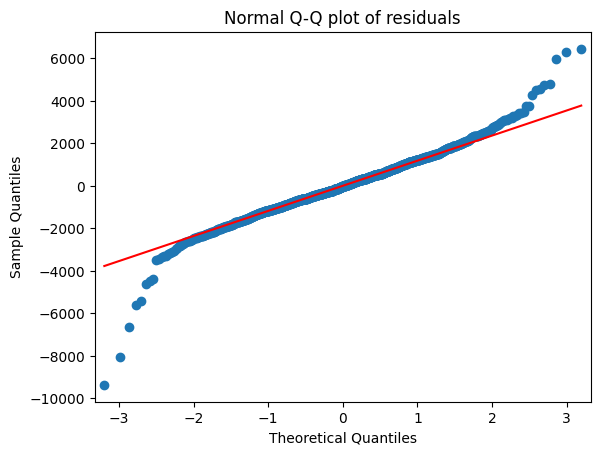

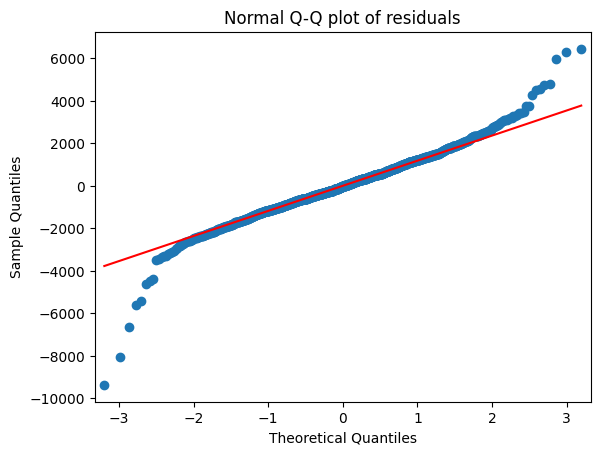

In [371]:
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [372]:
list(np.where(model.resid>4000))

[array([ 109,  110,  111,  125,  147,  171,  523, 1058])]

[array([ 109,  110,  111,  125,  147,  171,  523, 1058])]

In [373]:
# residual plot for Homoscedasticity

In [374]:
def get_standardized_values( vals ):
  return (vals - vals.mean())/vals.std()

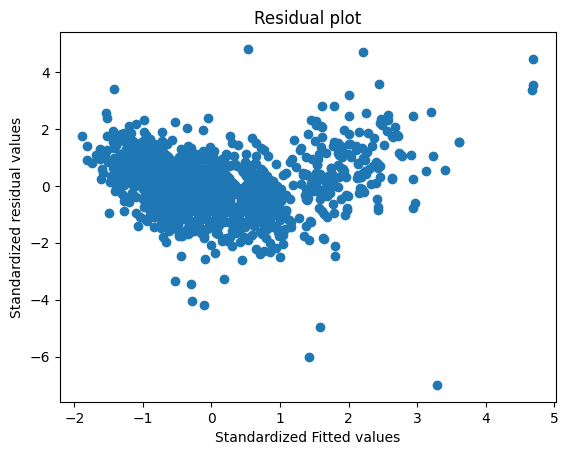

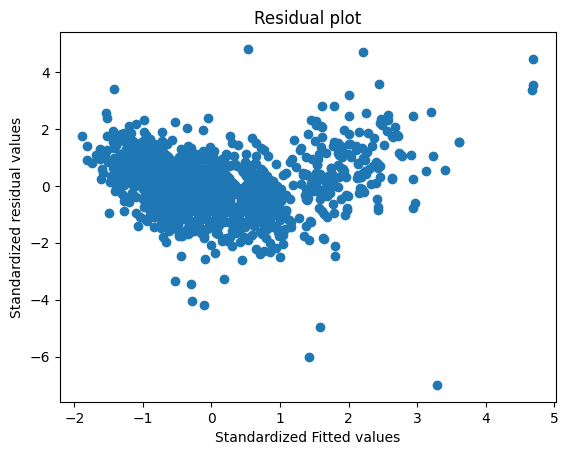

In [375]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

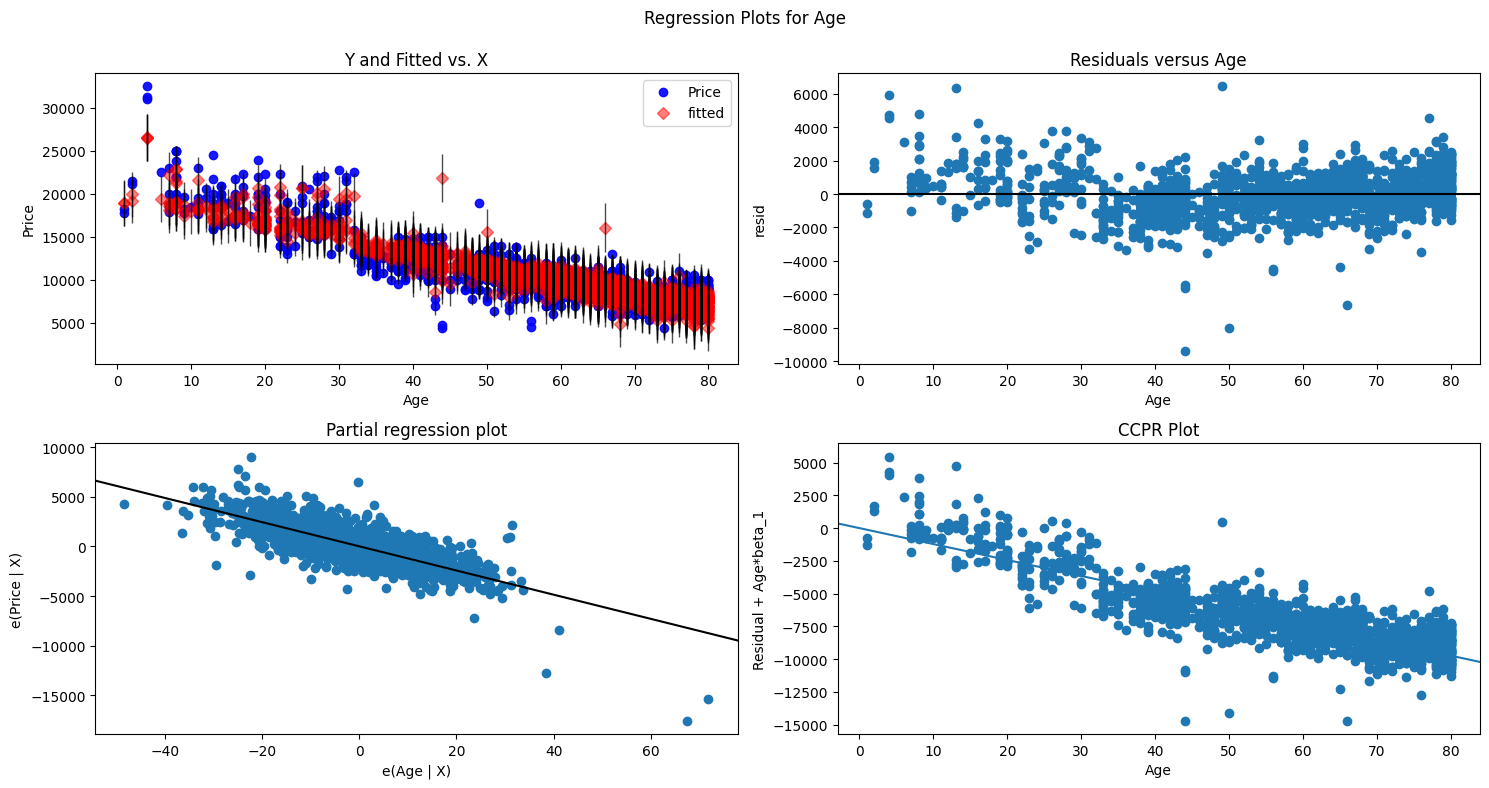

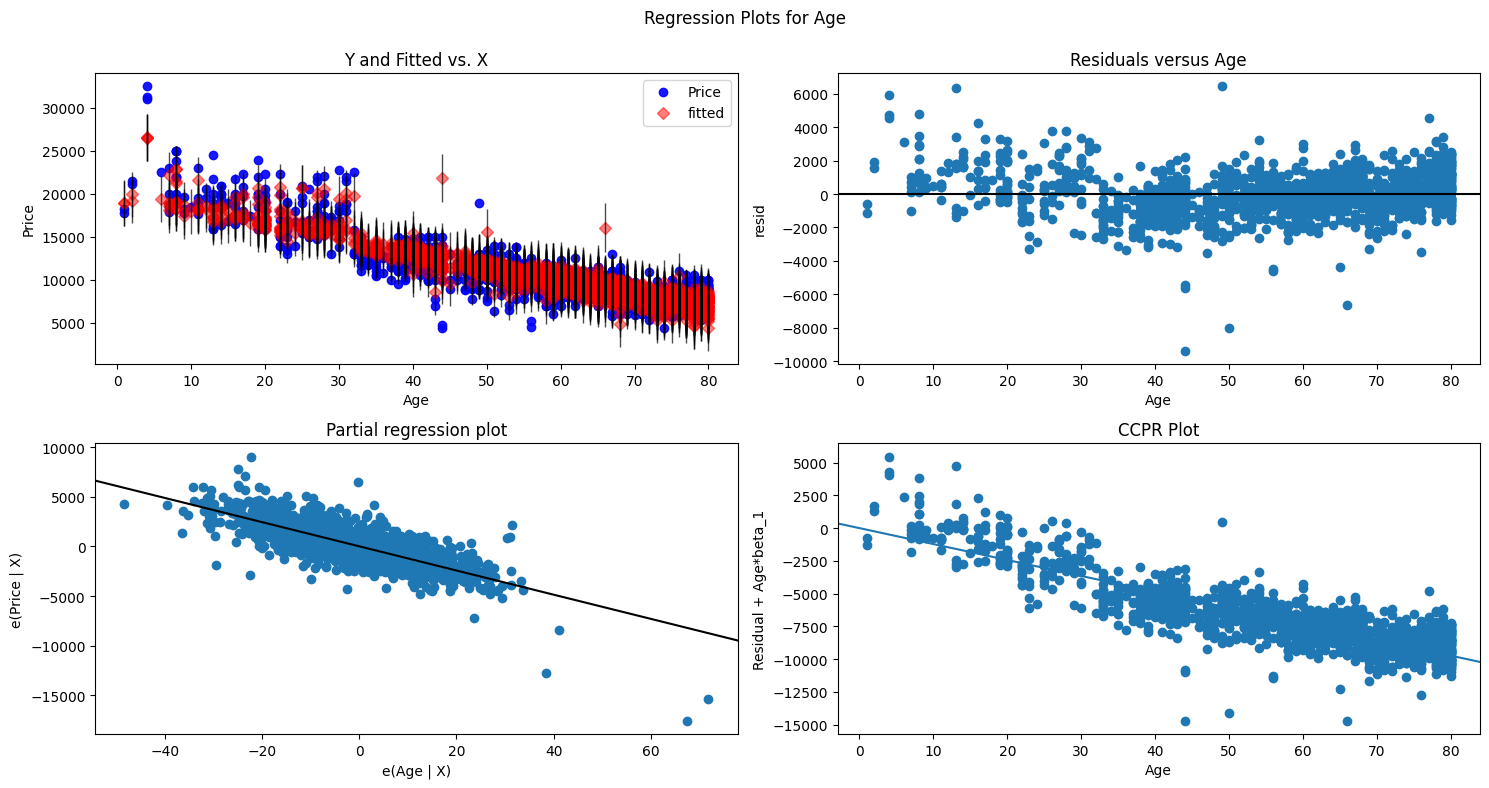

In [376]:
# Residual vs Regressors
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age" , fig=fig)
plt.show()

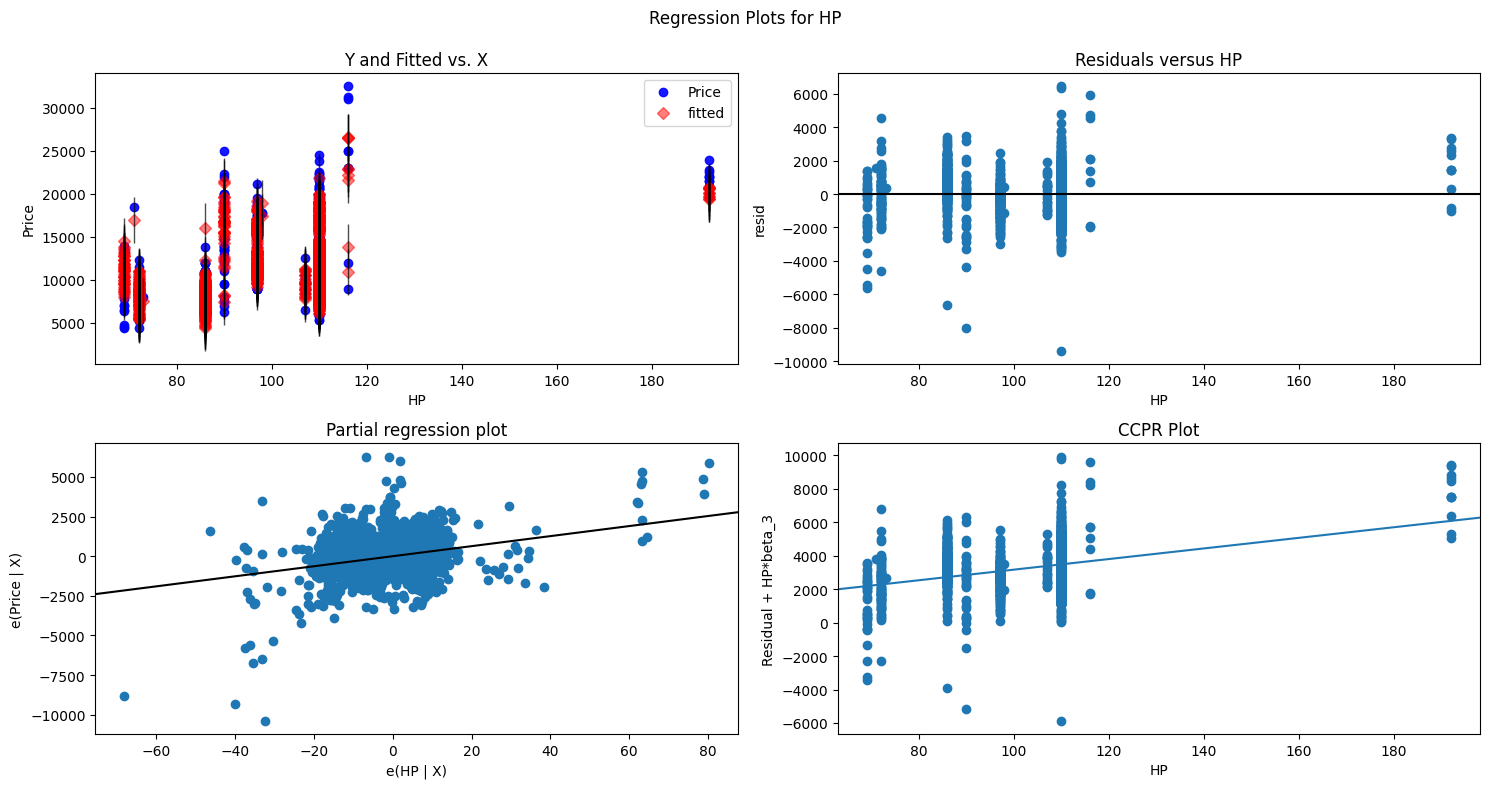

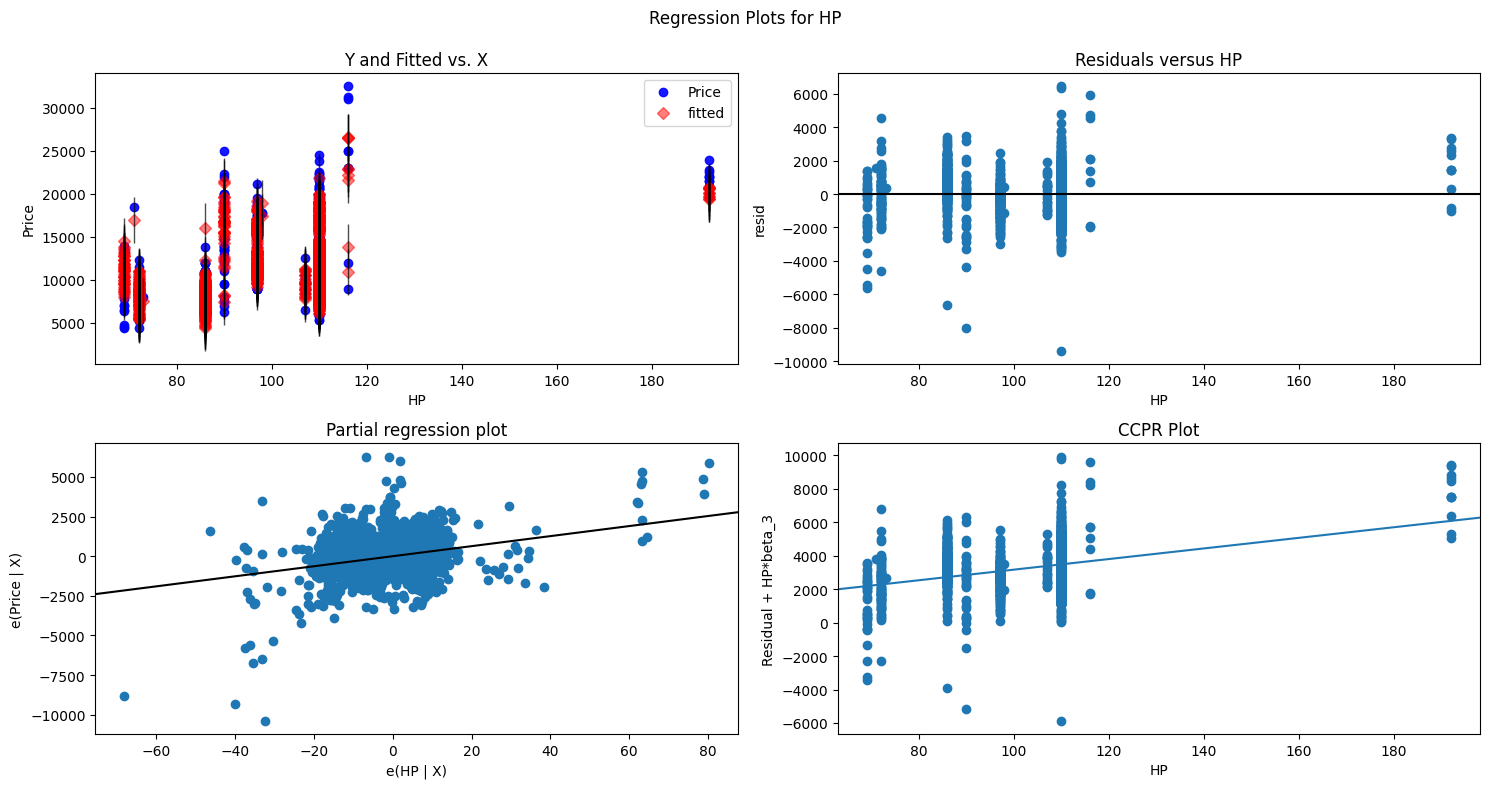

In [377]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP" , fig=fig)
plt.show()

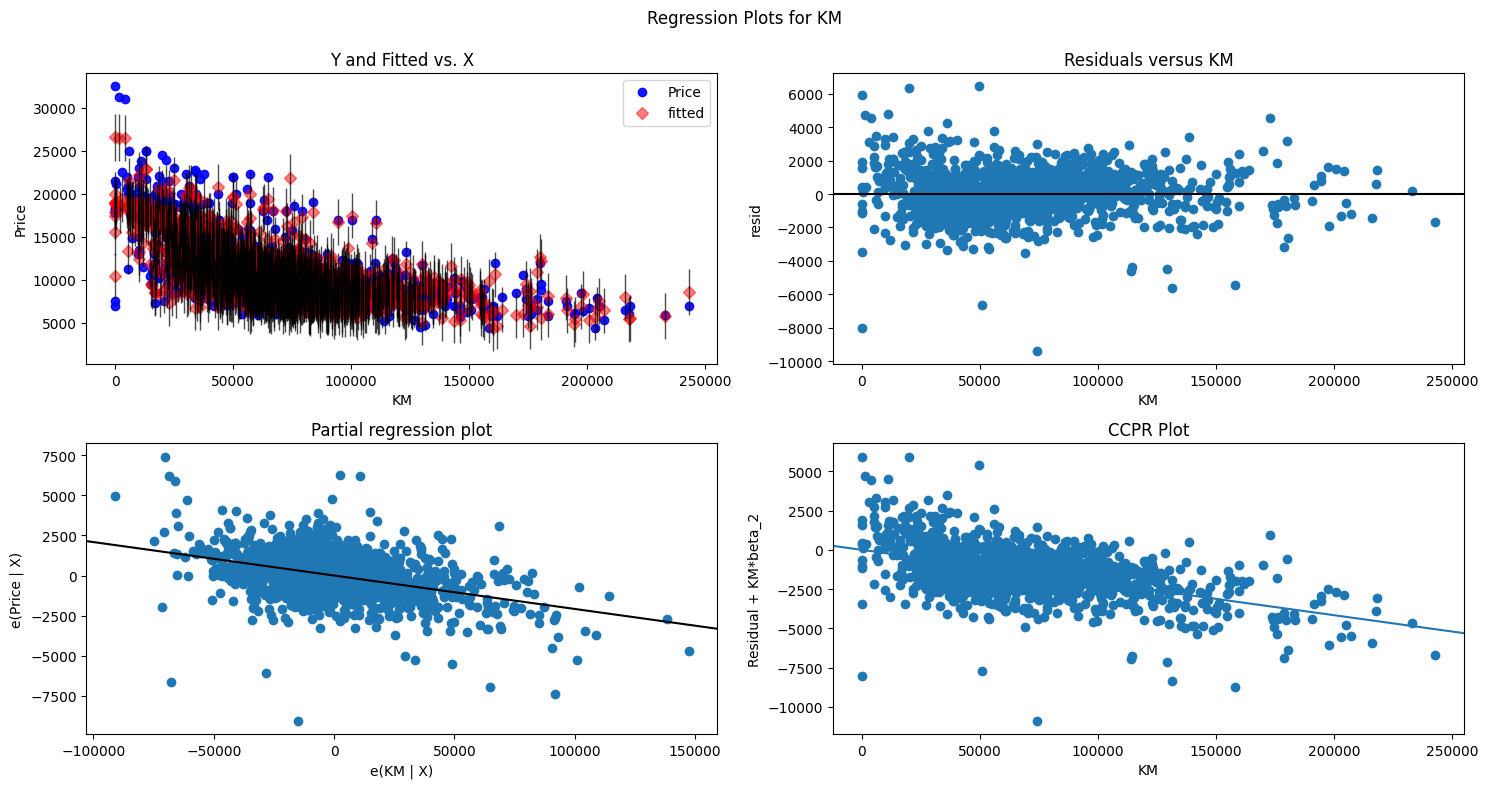

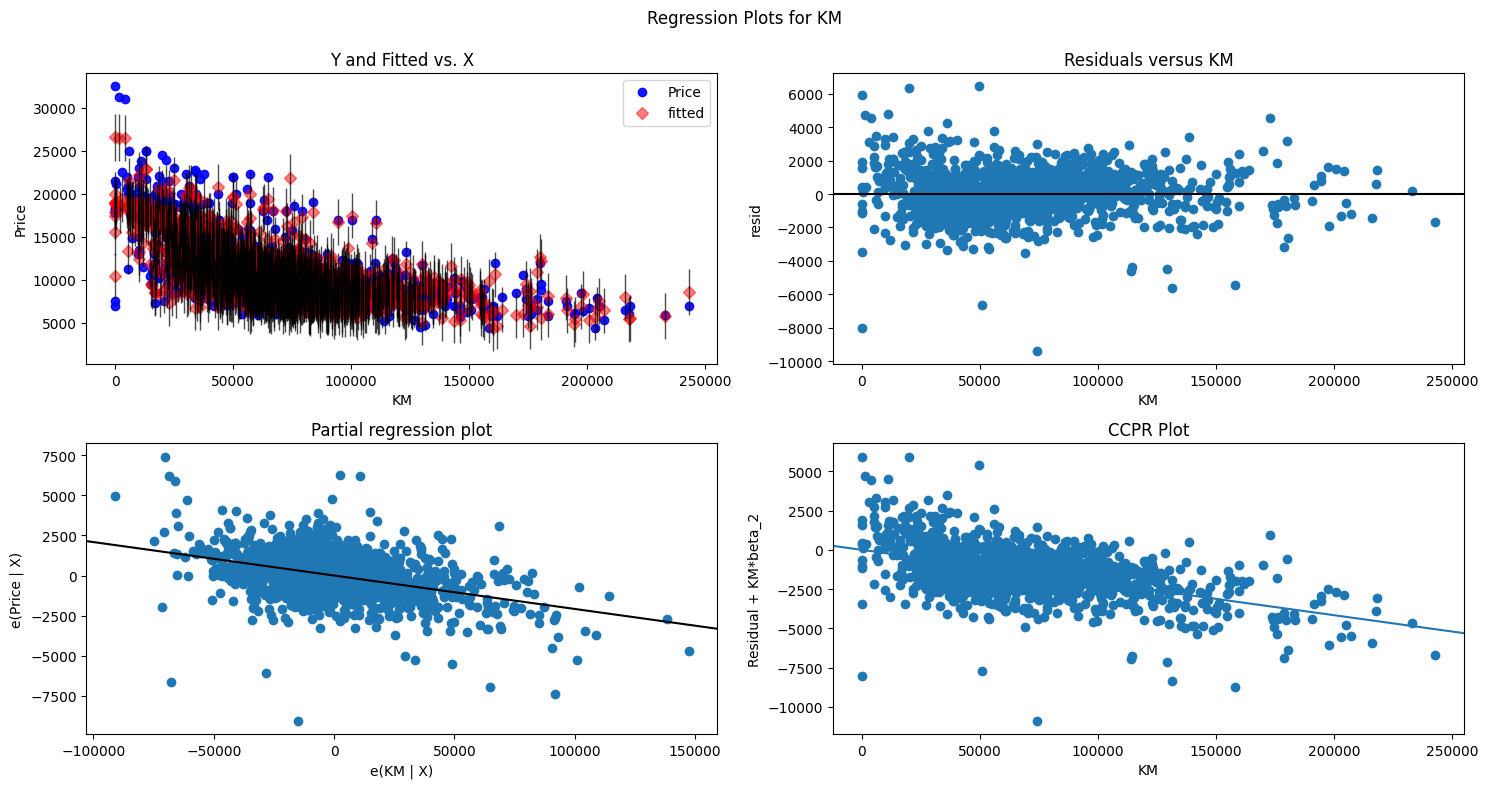

In [378]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM" , fig=fig)
plt.show()

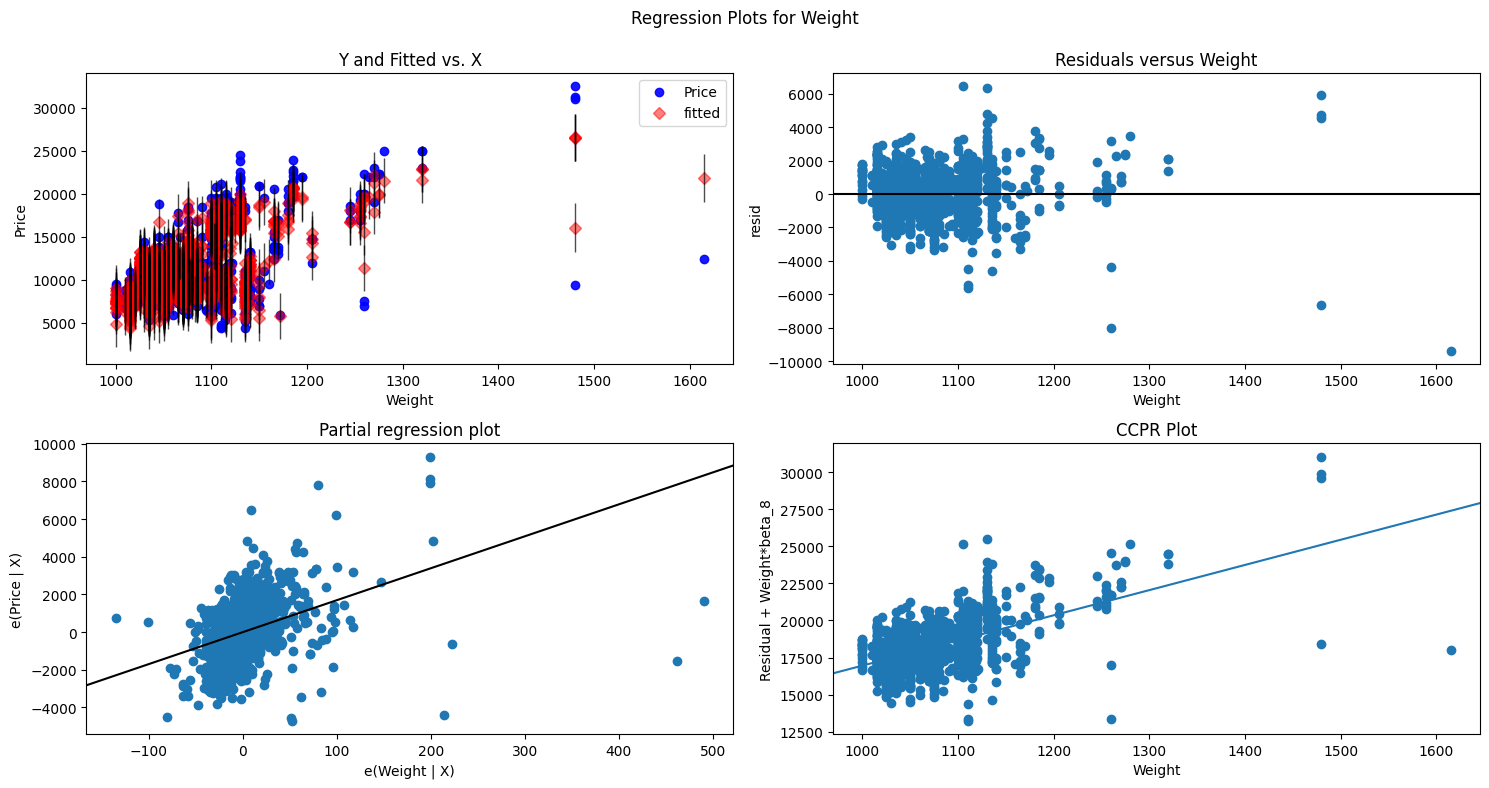

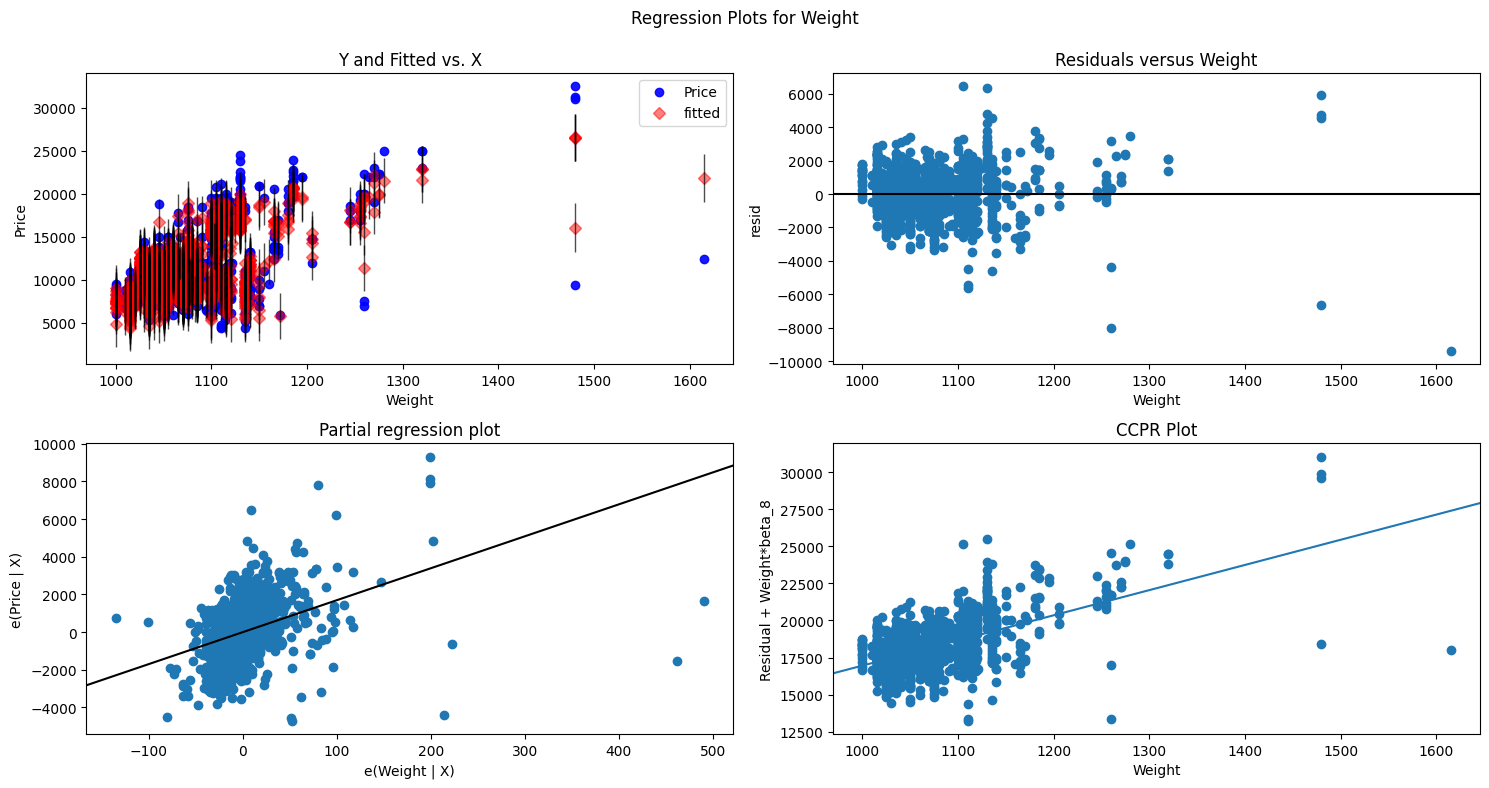

In [379]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Weight" , fig=fig)
plt.show()

In [380]:
# model deletion
# detecting influencers/Outliers
#Cook's Distance

In [381]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

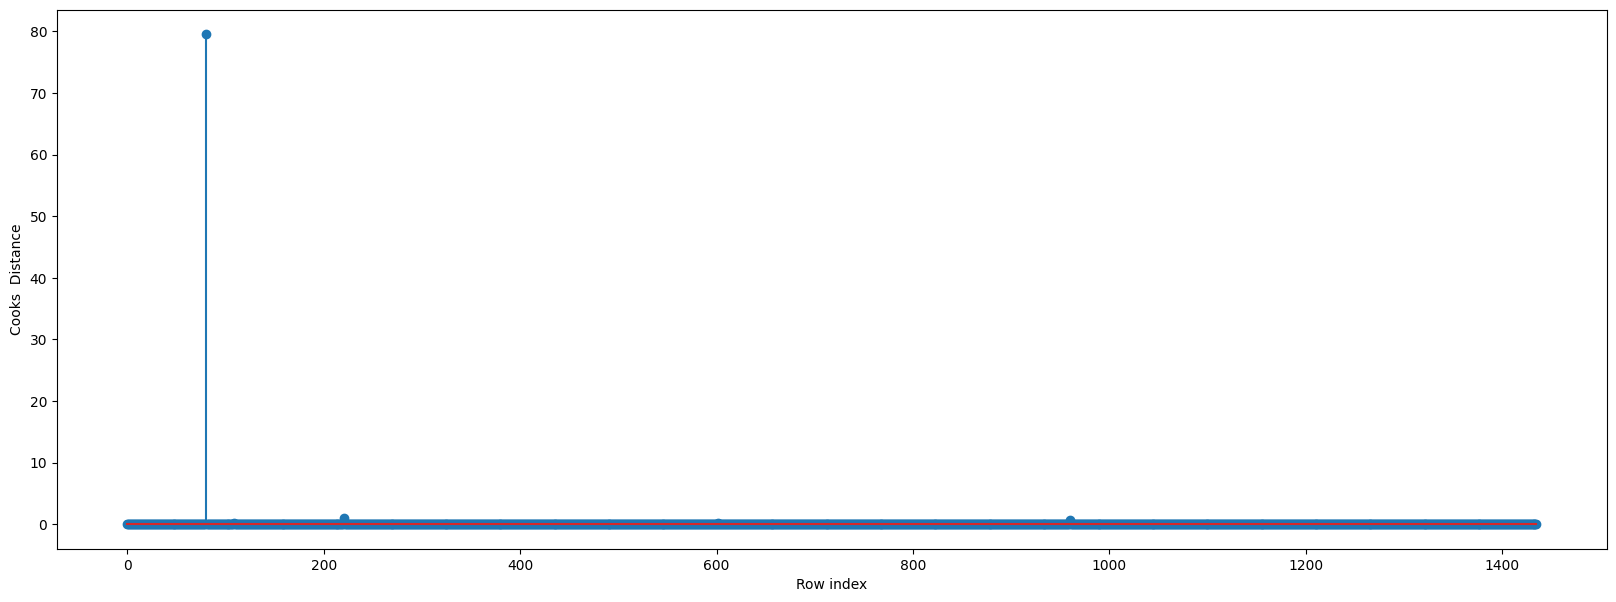

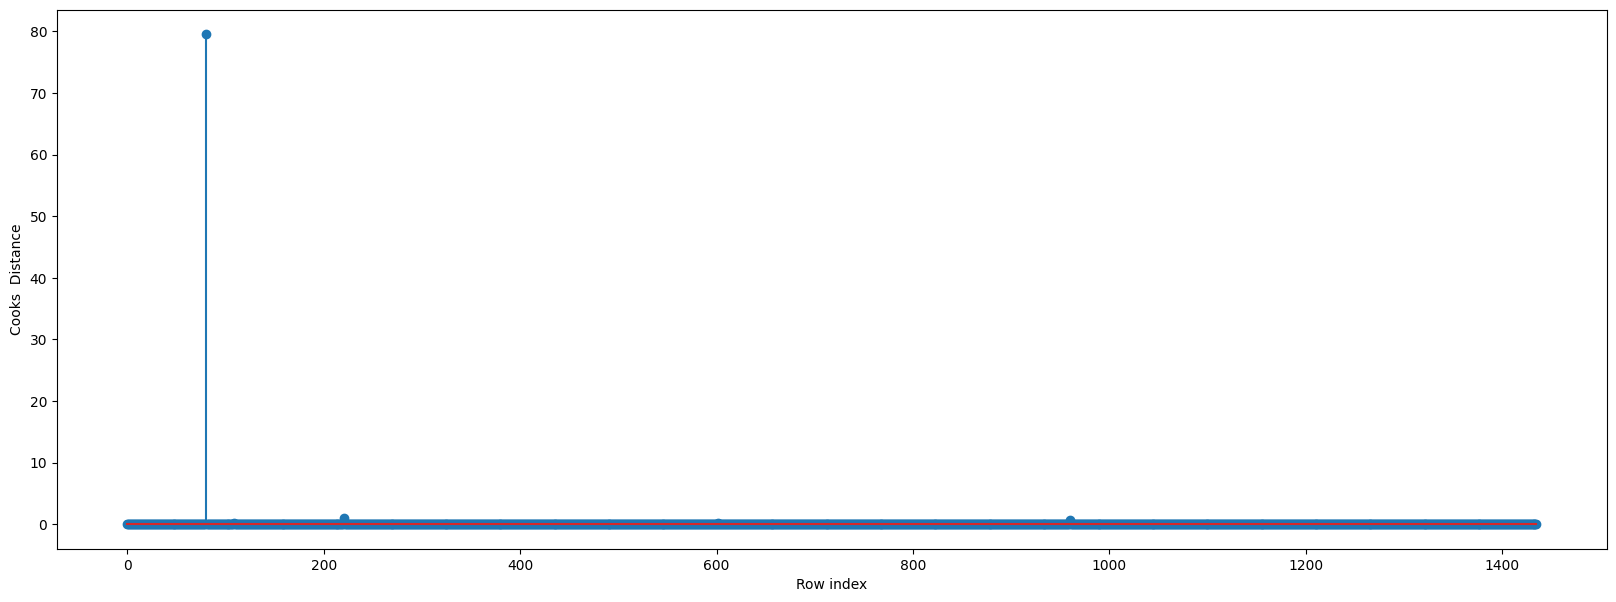

In [382]:
# plot the influence values using stem plot
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks  Distance')
plt.show()

In [383]:
(np.argmax(c),np.max(c))

(80, 79.52010624141815)

(80, 79.52010624141815)

In [384]:
# high influence points

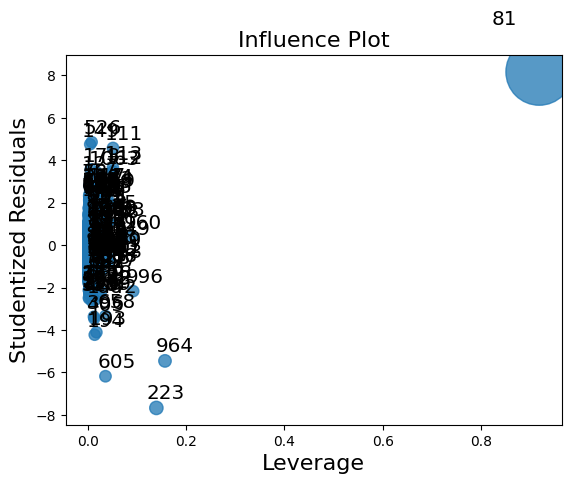

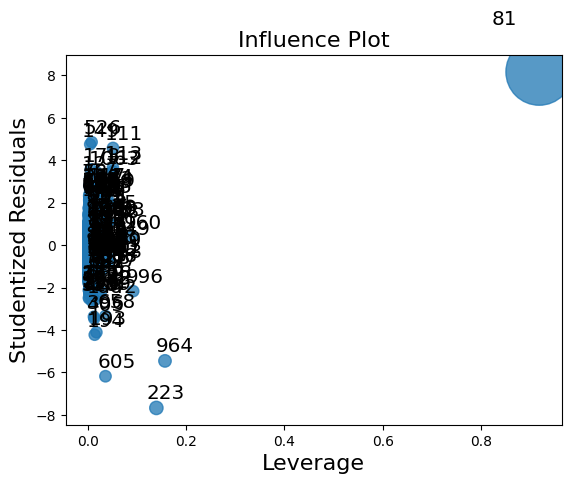

In [385]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [386]:
df1.shape

(1436, 10)

(1436, 10)

In [387]:
k = df1.shape[1]
n = df1.shape[0]
leverage_cutoff = 3*((k+1)/n)
leverage_cutoff

0.02298050139275766

0.02298050139275766

In [388]:
# from the above plot,it is evident that data point 48,49 are the influencers

In [389]:
df1[df1.index.isin([81])]

,Model,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Id,,,,,,,,,,
81,NaN,18950,25,20019,110,16000,5,5,100,1180


,Model,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Id,,,,,,,,,,
81,NaN,18950,25,20019,110,16000,5,5,100,1180


In [390]:
df1.head()

,Model,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Id,,,,,,,,,,
1,NaN,13500,23,46986,90,2000,3,5,210,1165
2,NaN,13750,23,72937,90,2000,3,5,210,1165
3,NaN,13950,24,41711,90,2000,3,5,210,1165
4,NaN,14950,26,48000,90,2000,3,5,210,1165
5,NaN,13750,30,38500,90,2000,3,5,210,1170


,Model,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Id,,,,,,,,,,
1,NaN,13500,23,46986,90,2000,3,5,210,1165
2,NaN,13750,23,72937,90,2000,3,5,210,1165
3,NaN,13950,24,41711,90,2000,3,5,210,1165
4,NaN,14950,26,48000,90,2000,3,5,210,1165
5,NaN,13750,30,38500,90,2000,3,5,210,1170


In [391]:
# improving the model

In [392]:
DF = df1.drop(df1.index[[81]],axis = 0)
DF

,Model,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Id,,,,,,,,,,
1,NaN,13500,23,46986,90,2000,3,5,210,1165
2,NaN,13750,23,72937,90,2000,3,5,210,1165
3,NaN,13950,24,41711,90,2000,3,5,210,1165
4,NaN,14950,26,48000,90,2000,3,5,210,1165
5,NaN,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1438,NaN,7500,69,20544,86,1300,3,5,69,1025
1439,NaN,10845,72,19000,86,1300,3,5,69,1015
1440,NaN,8500,71,17016,86,1300,3,5,69,1015


,Model,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Id,,,,,,,,,,
1,NaN,13500,23,46986,90,2000,3,5,210,1165
2,NaN,13750,23,72937,90,2000,3,5,210,1165
3,NaN,13950,24,41711,90,2000,3,5,210,1165
4,NaN,14950,26,48000,90,2000,3,5,210,1165
5,NaN,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1438,NaN,7500,69,20544,86,1300,3,5,69,1025
1439,NaN,10845,72,19000,86,1300,3,5,69,1015
1440,NaN,8500,71,17016,86,1300,3,5,69,1015


In [394]:
k = df1.shape[1]
n = df1.shape[0]
leverage_cutoff = 3*((k+1)/n)
leverage_cutoff

0.02298050139275766

In [395]:
df1[df1.index.isin([81])]

,Model,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Id,,,,,,,,,,
81,NaN,18950,25,20019,110,16000,5,5,100,1180


In [396]:
df1.head()

,Model,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Id,,,,,,,,,,
1,NaN,13500,23,46986,90,2000,3,5,210,1165
2,NaN,13750,23,72937,90,2000,3,5,210,1165
3,NaN,13950,24,41711,90,2000,3,5,210,1165
4,NaN,14950,26,48000,90,2000,3,5,210,1165
5,NaN,13750,30,38500,90,2000,3,5,210,1170


In [397]:
DF = df1.drop(df1.index[[81]],axis = 0)
DF

,Model,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Id,,,,,,,,,,
1,NaN,13500,23,46986,90,2000,3,5,210,1165
2,NaN,13750,23,72937,90,2000,3,5,210,1165
3,NaN,13950,24,41711,90,2000,3,5,210,1165
4,NaN,14950,26,48000,90,2000,3,5,210,1165
5,NaN,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1438,NaN,7500,69,20544,86,1300,3,5,69,1025
1439,NaN,10845,72,19000,86,1300,3,5,69,1015
1440,NaN,8500,71,17016,86,1300,3,5,69,1015


In [398]:
# BUILD MODEL

In [400]:
import statsmodels.formula.api as smf
modelFINAL = smf.ols('Price~Age+KM+HP+Weight',data=DF).fit()

In [401]:
modelFINAL.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     2225.
Date:                Tue, 12 Sep 2023   Prob (F-statistic):               0.00
Time:                        12:36:41   Log-Likelihood:                -12377.
No. Observations:                1435   AIC:                         2.476e+04
Df Residuals:                    1430   BIC:                         2.479e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4011.5678    936.109     -4.285      0.000   -5847.862   -2175.273
Age         -122.3861      2.624    -46.644      0.000    -127.533    -117.239
KM            -0.0196      0.001    -16.252      0.000      -0.022      -0.017
HP            30.2045      2.540     11.893      0.000      25.223      35.186
Weight        18.5257      0.803     23.074      0.000      16.951      20.101
==============================================================================
Omnibus:                      196.549   Durbin-Watson:                   1.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1497.838
Skew:                          -0.381   Prob(JB):                         0.00
Kurtosis:                       7.947   Cond. No.                     2.05e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.05e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [402]:
model_influence_V = modelFINAL.get_influence()
(c_V, _) = model_influence_V.cooks_distance

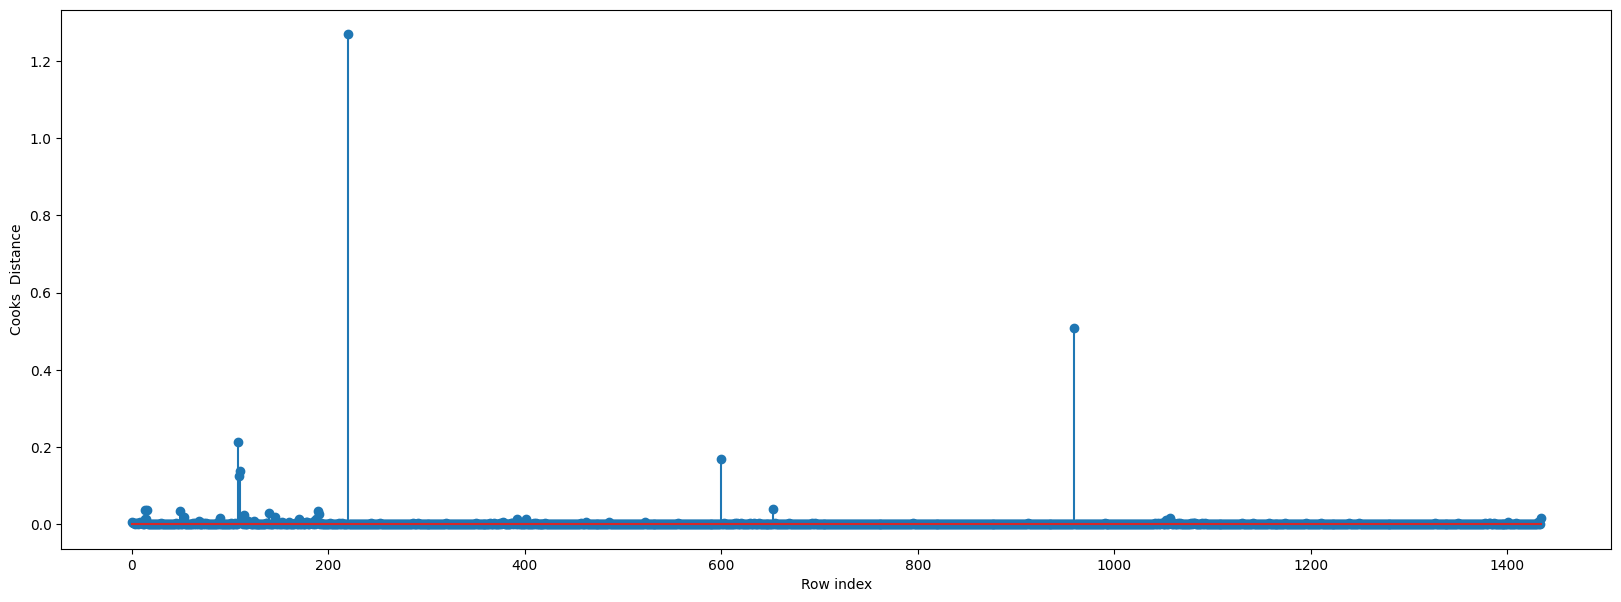

In [405]:
# plot the influence values using stem plot
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(DF)), np.round(c_V,3))
plt.xlabel('Row index')
plt.ylabel('Cooks  Distance')
plt.show()

In [406]:
(np.argmax(c_V),np.max(c_V))

(220, 1.2688319049404384)

In [407]:
DF1 = DF.drop(DF.index[[220]],axis =0)

In [408]:
DF1

,Model,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Id,,,,,,,,,,
1,NaN,13500,23,46986,90,2000,3,5,210,1165
2,NaN,13750,23,72937,90,2000,3,5,210,1165
3,NaN,13950,24,41711,90,2000,3,5,210,1165
4,NaN,14950,26,48000,90,2000,3,5,210,1165
5,NaN,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1438,NaN,7500,69,20544,86,1300,3,5,69,1025
1439,NaN,10845,72,19000,86,1300,3,5,69,1015
1440,NaN,8500,71,17016,86,1300,3,5,69,1015


In [410]:
modelFINAL1 = smf.ols('Price~Age+KM+HP+Weight',data=DF1).fit()
modelFINAL1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     2335.
Date:                Tue, 12 Sep 2023   Prob (F-statistic):               0.00
Time:                        13:03:49   Log-Likelihood:                -12339.
No. Observations:                1434   AIC:                         2.469e+04
Df Residuals:                    1429   BIC:                         2.471e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6245.9396    959.208     -6.512      0.000   -8127.546   -4364.333
Age         -119.3036      2.599    -45.911      0.000    -124.401    -114.206
KM            -0.0203      0.001    -17.147      0.000      -0.023      -0.018
HP            29.8730      2.487     12.011      0.000      24.994      34.752
Weight        20.5320      0.826     24.853      0.000      18.911      22.153
==============================================================================
Omnibus:                      150.935   Durbin-Watson:                   1.590
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              891.111
Skew:                          -0.283   Prob(JB):                    3.15e-194
Kurtosis:                       6.820   Cond. No.                     2.15e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [411]:
model_influence_V1 = modelFINAL1.get_influence()
(c_V1, _) = model_influence_V1.cooks_distance

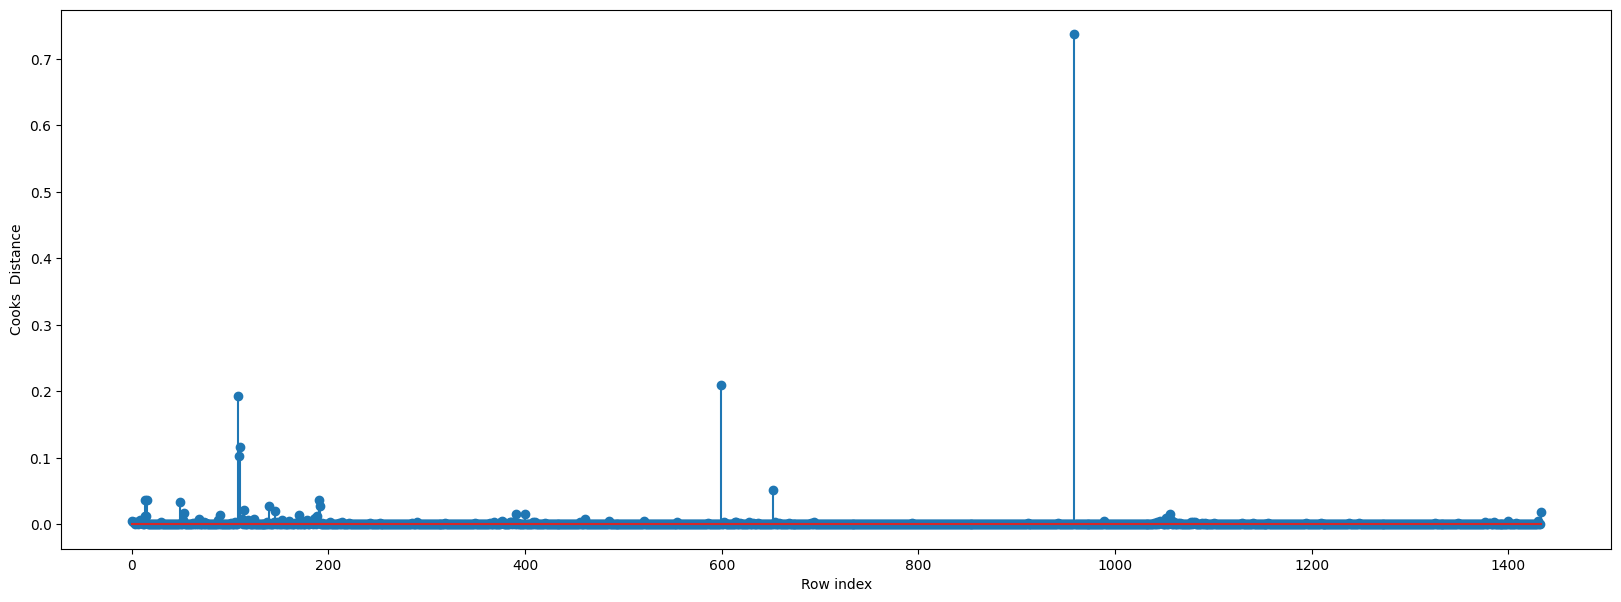

In [412]:
# plot the influence values using stem plot
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(DF1)), np.round(c_V1,3))
plt.xlabel('Row index')
plt.ylabel('Cooks  Distance')
plt.show()

In [413]:
(np.argmax(c_V1),np.max(c_V1))

(958, 0.7365953991466693)

In [414]:
DF2 = DF1.drop(DF1.index[[958]],axis =0)

In [415]:
DF2

,Model,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Id,,,,,,,,,,
1,NaN,13500,23,46986,90,2000,3,5,210,1165
2,NaN,13750,23,72937,90,2000,3,5,210,1165
3,NaN,13950,24,41711,90,2000,3,5,210,1165
4,NaN,14950,26,48000,90,2000,3,5,210,1165
5,NaN,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1438,NaN,7500,69,20544,86,1300,3,5,69,1025
1439,NaN,10845,72,19000,86,1300,3,5,69,1015
1440,NaN,8500,71,17016,86,1300,3,5,69,1015


In [416]:
modelFINAL2 = smf.ols('Price~Age+KM+HP+Weight',data=DF2).fit()
modelFINAL2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     2419.
Date:                Tue, 12 Sep 2023   Prob (F-statistic):               0.00
Time:                        13:15:36   Log-Likelihood:                -12308.
No. Observations:                1433   AIC:                         2.463e+04
Df Residuals:                    1428   BIC:                         2.465e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7907.5262    976.462     -8.098      0.000   -9822.980   -5992.073
Age         -116.2597      2.599    -44.733      0.000    -121.358    -111.161
KM            -0.0213      0.001    -18.077      0.000      -0.024      -0.019
HP            28.7852      2.455     11.726      0.000      23.970      33.601
Weight        22.0910      0.846     26.112      0.000      20.432      23.751
==============================================================================
Omnibus:                      122.227   Durbin-Watson:                   1.618
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              622.782
Skew:                          -0.198   Prob(JB):                    5.82e-136
Kurtosis:                       6.205   Cond. No.                     2.22e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.22e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [417]:
modelFINAL2.params

Intercept   -7907.526246
Age          -116.259720
KM             -0.021260
HP             28.785174
Weight         22.091042
dtype: float64

In [418]:
(modelFINAL2.rsquared,modelFINAL2.rsquared_adj)

(0.8713845889937265, 0.8710243217360059)

In [419]:
DF2.describe()

,Model,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,0.0,1433.000000,1433.000000,1433.000000,1433.000000,1433.000000,1433.000000,1433.000000,1433.000000,1433.000000
mean,NaN,10726.011165,55.967202,68575.563852,101.501047,1577.016748,4.032798,5.026518,87.118632,1071.766923
std,NaN,3626.211533,18.601253,37520.560253,14.987803,424.767164,0.952598,0.188704,41.083355,49.533960
min,NaN,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,NaN,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,NaN,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,NaN,11950.000000,70.000000,87083.000000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,NaN,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1480.000000


In [420]:
# predciting for new data

In [421]:
new_data = pd.DataFrame({'Age':83,'KM':250000,'HP':200,'Weight':1500},index=[1])

In [422]:
new_data

,Age,KM,HP,Weight
1,83,250000,200,1500


In [423]:
modelFINAL2.predict(new_data)

1    16021.55769
dtype: float64

In [424]:
modelFINAL2.predict(DF2.iloc[0:5,:])

Id
1    16746.315389
2    16194.601594
3    16742.201261
4    16375.978764
5    16223.363460
dtype: float64

In [425]:
DF2.head()

,Model,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Id,,,,,,,,,,
1,NaN,13500,23,46986,90,2000,3,5,210,1165
2,NaN,13750,23,72937,90,2000,3,5,210,1165
3,NaN,13950,24,41711,90,2000,3,5,210,1165
4,NaN,14950,26,48000,90,2000,3,5,210,1165
5,NaN,13750,30,38500,90,2000,3,5,210,1170


In [426]:
# IMPLEMENTION OF SKLEARN

In [427]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [431]:
X = DF2[['Age','KM','HP','Weight']]
y = DF2[['Price']]

In [432]:
X

,Age,KM,HP,Weight
Id,,,,
1,23,46986,90,1165
2,23,72937,90,1165
3,24,41711,90,1165
4,26,48000,90,1165
5,30,38500,90,1170
...,...,...,...,...
1438,69,20544,86,1025
1439,72,19000,86,1015
1440,71,17016,86,1015


In [433]:
y

,Price
Id,
1,13500
2,13750
3,13950
4,14950
5,13750
...,...
1438,7500
1439,10845
1440,8500


In [434]:
# split training set and testing set

In [435]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [436]:
X_test.shape,X_train.shape

((287, 4), (1146, 4))

In [437]:
y_train.shape,y_test.shape

((1146, 1), (287, 1))

In [438]:
#create the model

In [439]:
model = LinearRegression()

In [440]:
# train model on training data
model.fit(X_train, y_train)

LinearRegression()

In [441]:
model.score(X_train,y_train)

0.8687349685933033

In [442]:
### test the model on  the training set
ytrain_predicted =model.predict(X_train)

In [443]:
import numpy as np

training_error = y_train - ytrain_predicted

In [444]:
training_error

,Price
Id,
1266,208.945867
831,110.087886
647,1344.764261
665,907.881369
394,-2029.014867
...,...
1155,1482.521951
940,425.330393
622,191.831751


In [445]:
train_mse = np.mean(training_error**2)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [446]:
train_mse

Price    1.684398e+06
dtype: float64

In [447]:
train_rmse = np.sqrt(train_mse)

In [448]:
train_rmse

Price    1297.843705
dtype: float64

In [449]:
## test model on testing set

In [450]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error,mean_absolute_percentage_error
mse = mean_squared_error(y_train,ytrain_predicted)
mse

1684398.2824586025

In [451]:
rmse = np.sqrt(mse)

In [452]:
rmse

1297.843704942395

In [453]:
ytest_predicted = model.predict(X_test)

In [454]:
test_mse = mean_squared_error(y_test,ytest_predicted)

In [455]:
test_mse

1717225.0478300601

In [456]:
test_rmse = np.sqrt(test_mse)

In [457]:
test_rmse

1310.4293372135944

In [458]:
train_mse,test_mse

(Price    1.684398e+06
 dtype: float64,
 1717225.0478300601)

In [459]:
train_rmse,test_rmse

(Price    1297.843705
 dtype: float64,
 1310.4293372135944)

In [460]:
mean_absolute_percentage_error(y_test,ytest_predicted)

0.1024276580796523